In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from lib_extrap import *


<IPython.core.display.Javascript object>


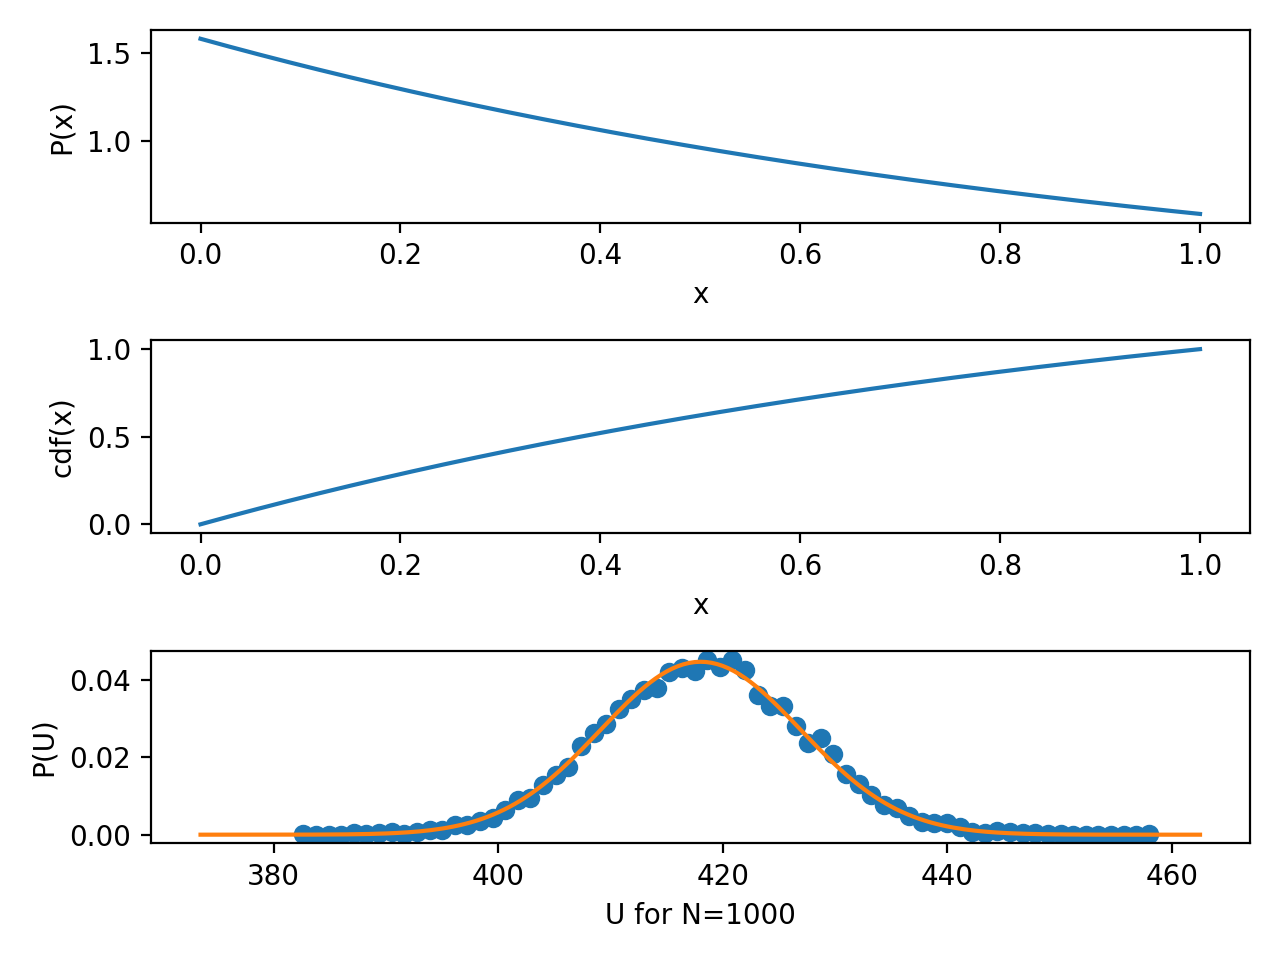

In [2]:
%matplotlib notebook

#Set up our IG model
mIG = IGmodel(nParticles=1000)

#And check some things out just with a test beta value, like 1.0 (just checking for right behavior)
testB = 1.0

uvals = mIG.sampleU(testB, s=10000)
uhist, ubins = np.histogram(uvals, bins='auto', density=True)
ubincents = 0.5*(ubins[:-1] + ubins[1:])
uavg = mIG.avgX(testB)*mIG.nP
ustd = np.sqrt(mIG.varX(testB)*mIG.nP)
utest = np.arange(uavg-5*ustd, uavg+5*ustd, 0.5)

fig, ax = plt.subplots(3)

xvals = np.arange(0.0, testB, 0.0001)

ax[0].plot(xvals, mIG.PofX(xvals, testB))
ax[1].plot(xvals, mIG.cdfX(xvals, testB))
ax[2].plot(ubincents, uhist, 'o')
ax[2].plot(utest, mIG.PofU(utest, testB))

ax[0].set_xlabel('x')
ax[0].set_ylabel('P(x)')
ax[1].set_xlabel('x')
ax[1].set_ylabel('cdf(x)')
ax[2].set_xlabel('U for N=%s'%mIG.nP)
ax[2].set_ylabel('P(U)')

fig.tight_layout()

plt.show()


The potential energy for each particle is only a function of the particle location, $U(x) = ax$. So the probability of a particle residing at a particular location is $\frac{e^{-\beta a x}}{\int_0^1 e^{-\beta a x} dx}$, shown in the top panel. The cumulative distribution function, which is used to randomly sample from the distribution $P(x)$, is shown in the middle. From $N$ random draws of $x$ distributed according to $P(x)$, you have a single configuration with $N$ particles. The potential energy for a single configuration is $a \sum_i x_i$ and so by randomly sampling many configuraitons, we construct the potential energy distribution in the bottom panel. For a single particle, the potential energy distribution is identical to P(x) since a single $x$ maps to exactly one potential energy. For many particles, however, the potential energy is a random variable composed of a sum of idependent random variables and so the distribution is Gaussian, as confirmed by the bottom panel.

<IPython.core.display.Javascript object>


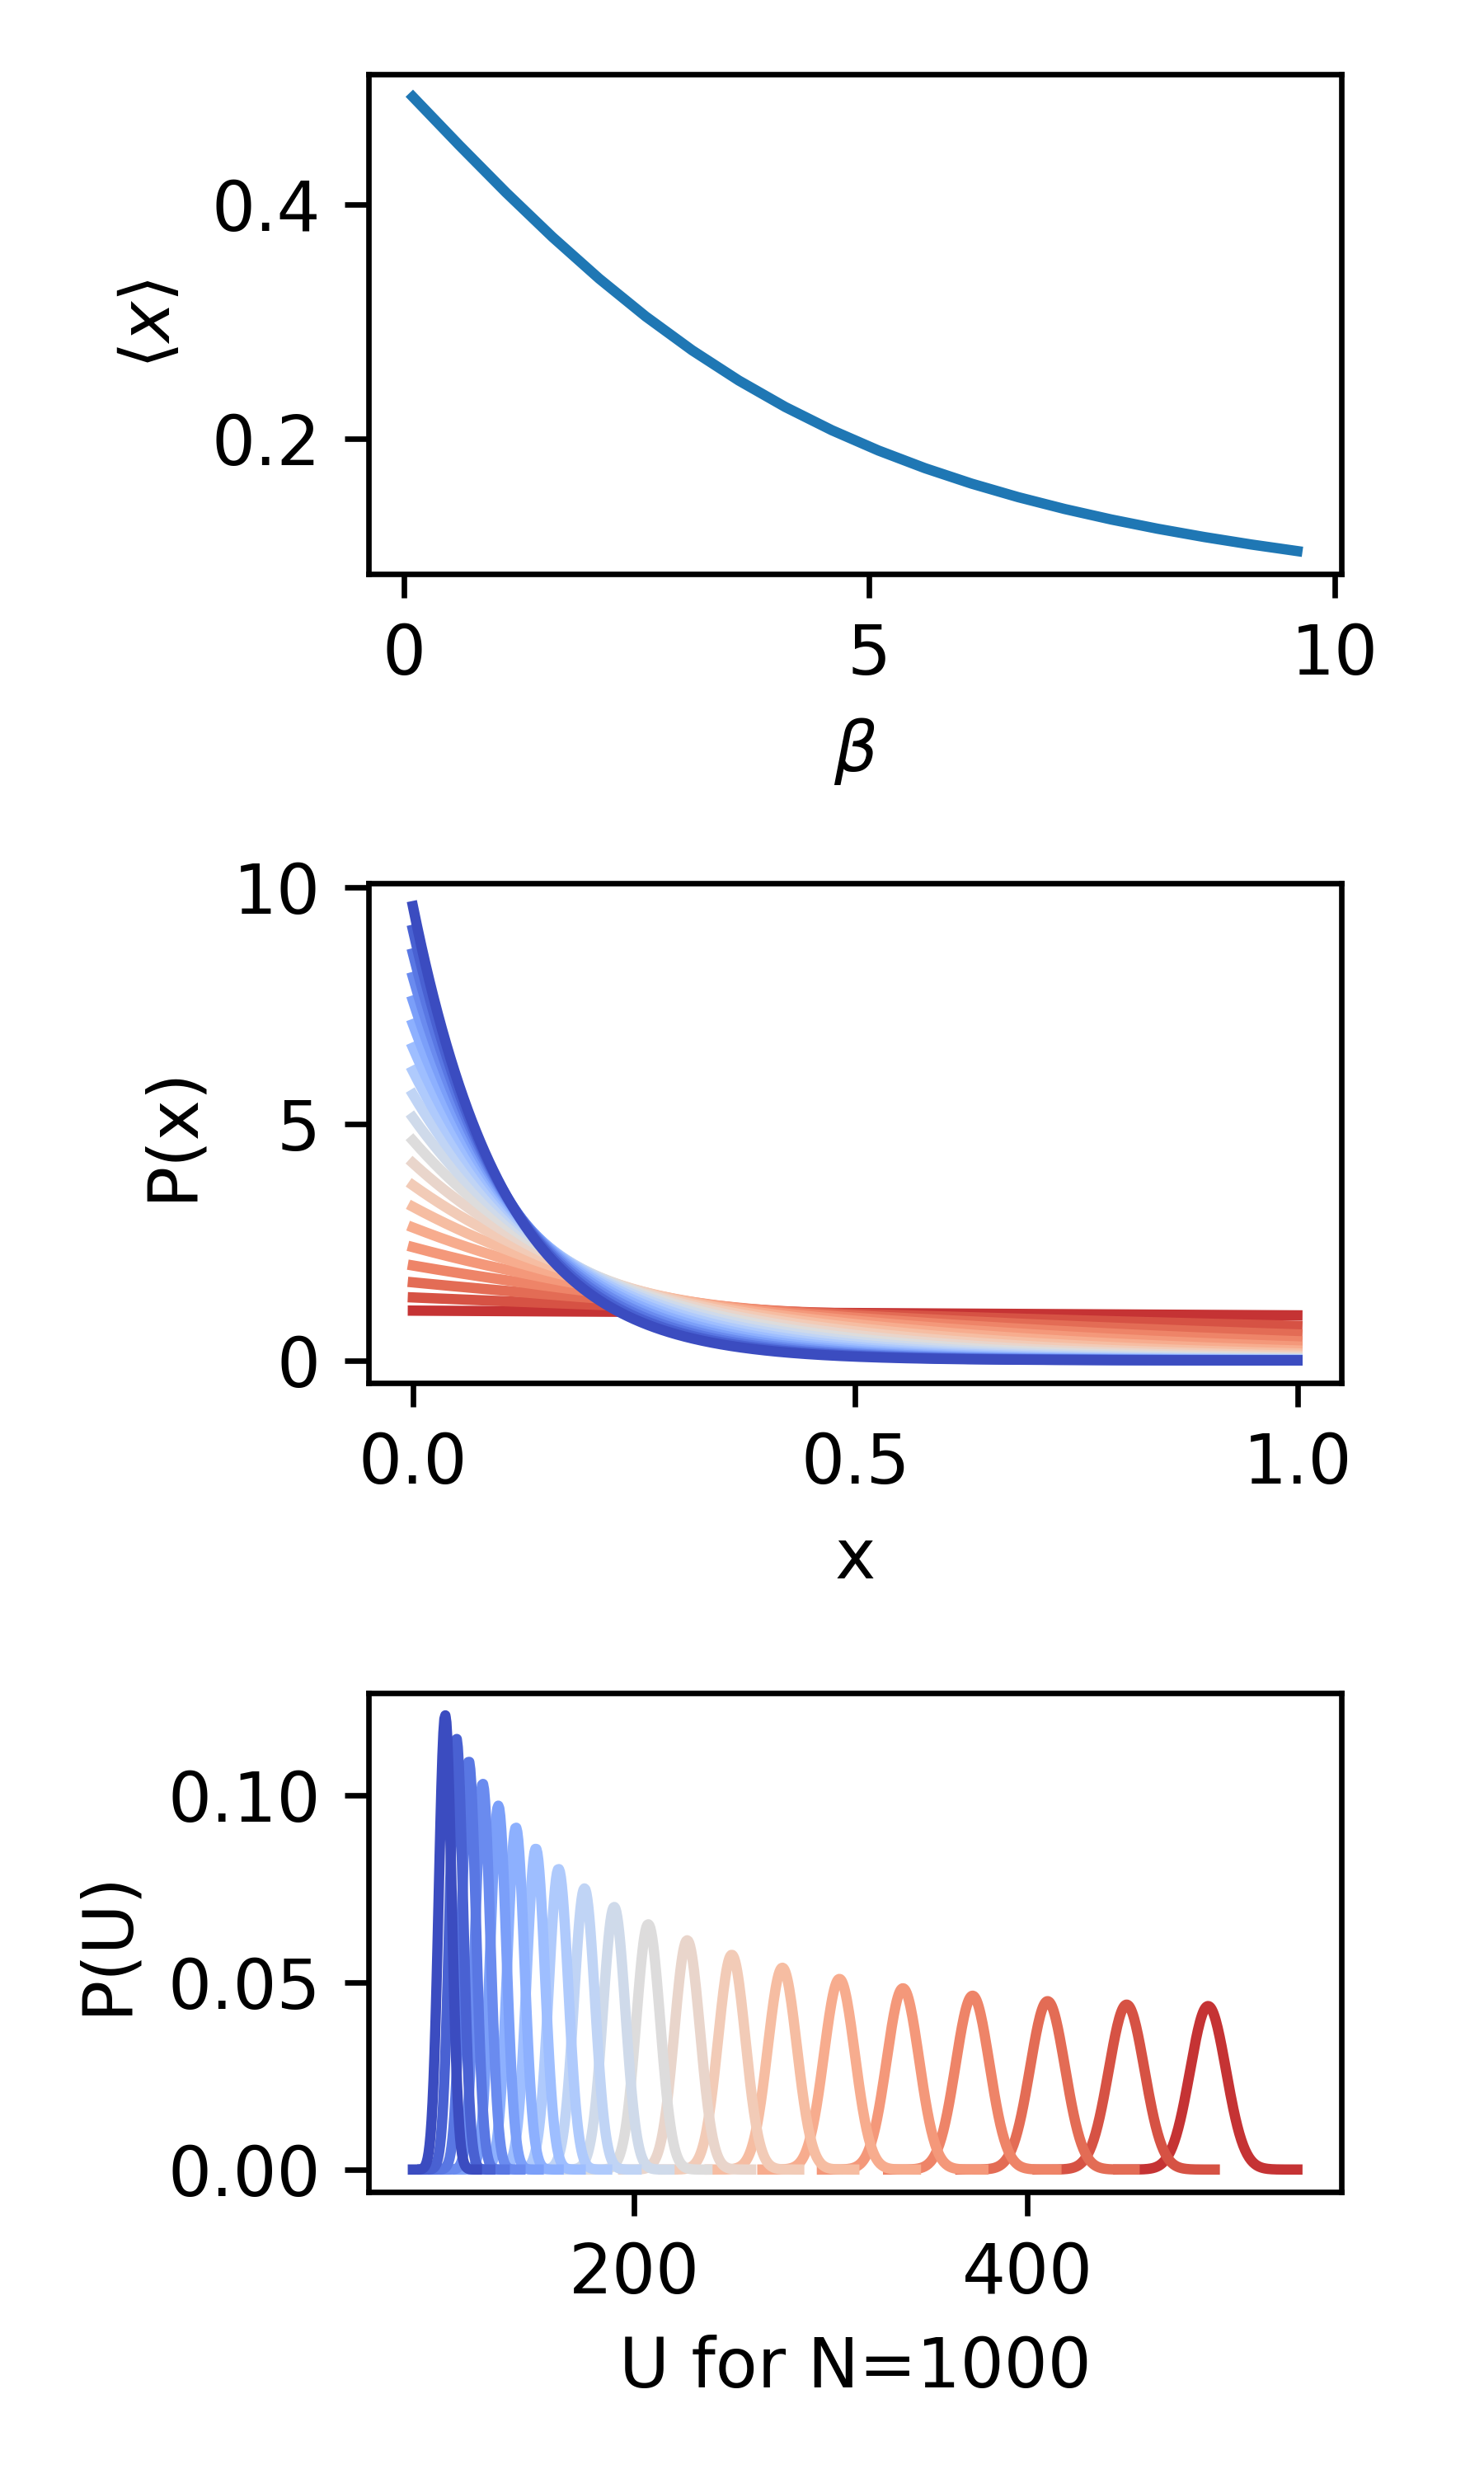

In [3]:
#Now look at behavior as a function of inverse temperature

%matplotlib notebook

betavals = np.arange(0.1, 10.0, 0.5)

bcolors = plt.cm.coolwarm(np.arange(0.0, 1.0, float(1.0/len(betavals))))

fig, ax = plt.subplots(3, figsize=(3,5), dpi=300)

ax[0].plot(betavals, mIG.avgX(betavals))

for i, B in enumerate(betavals):
    ax[1].plot(xvals, mIG.PofX(xvals, B), color=bcolors[-(i+1)])
    thisavg = mIG.nP*mIG.avgX(B)
    thisstd = np.sqrt(mIG.nP*mIG.varX(B))
    thisu = np.arange(thisavg-5*thisstd, thisavg+5*thisstd, 0.5)
    ax[2].plot(thisu, mIG.PofU(thisu, B), color=bcolors[-(i+1)])
    
ax[0].set_xlabel(r'$\beta$', fontsize=10)
ax[0].set_ylabel(r'$\langle x \rangle$', fontsize=10)
ax[1].set_xlabel('x', fontsize=10)
ax[1].set_ylabel('P(x)', fontsize=10)
ax[2].set_xlabel('U for N=%s'%mIG.nP, fontsize=10)
ax[2].set_ylabel('P(U)', fontsize=10)

fig.tight_layout()

plt.show()


A simple structural property of interest is the average $x$ value, which is plotted in the top panel as a function of $\beta$. It's only non-linear over a very large temperature range, but it's a toy system so the physical temperature really isn't relevant anyway. Changes in $P(x)$ and $P(U)$ with temperature are shown as well with coloring by temperature, NOT inverse temperature (blue is the lowest $T$, highest $\beta$). Clearly the configurational distributions will not overlap in their important regions and neither will the potential energy distributions, meaning perturbation won't work at some point.

<IPython.core.display.Javascript object>


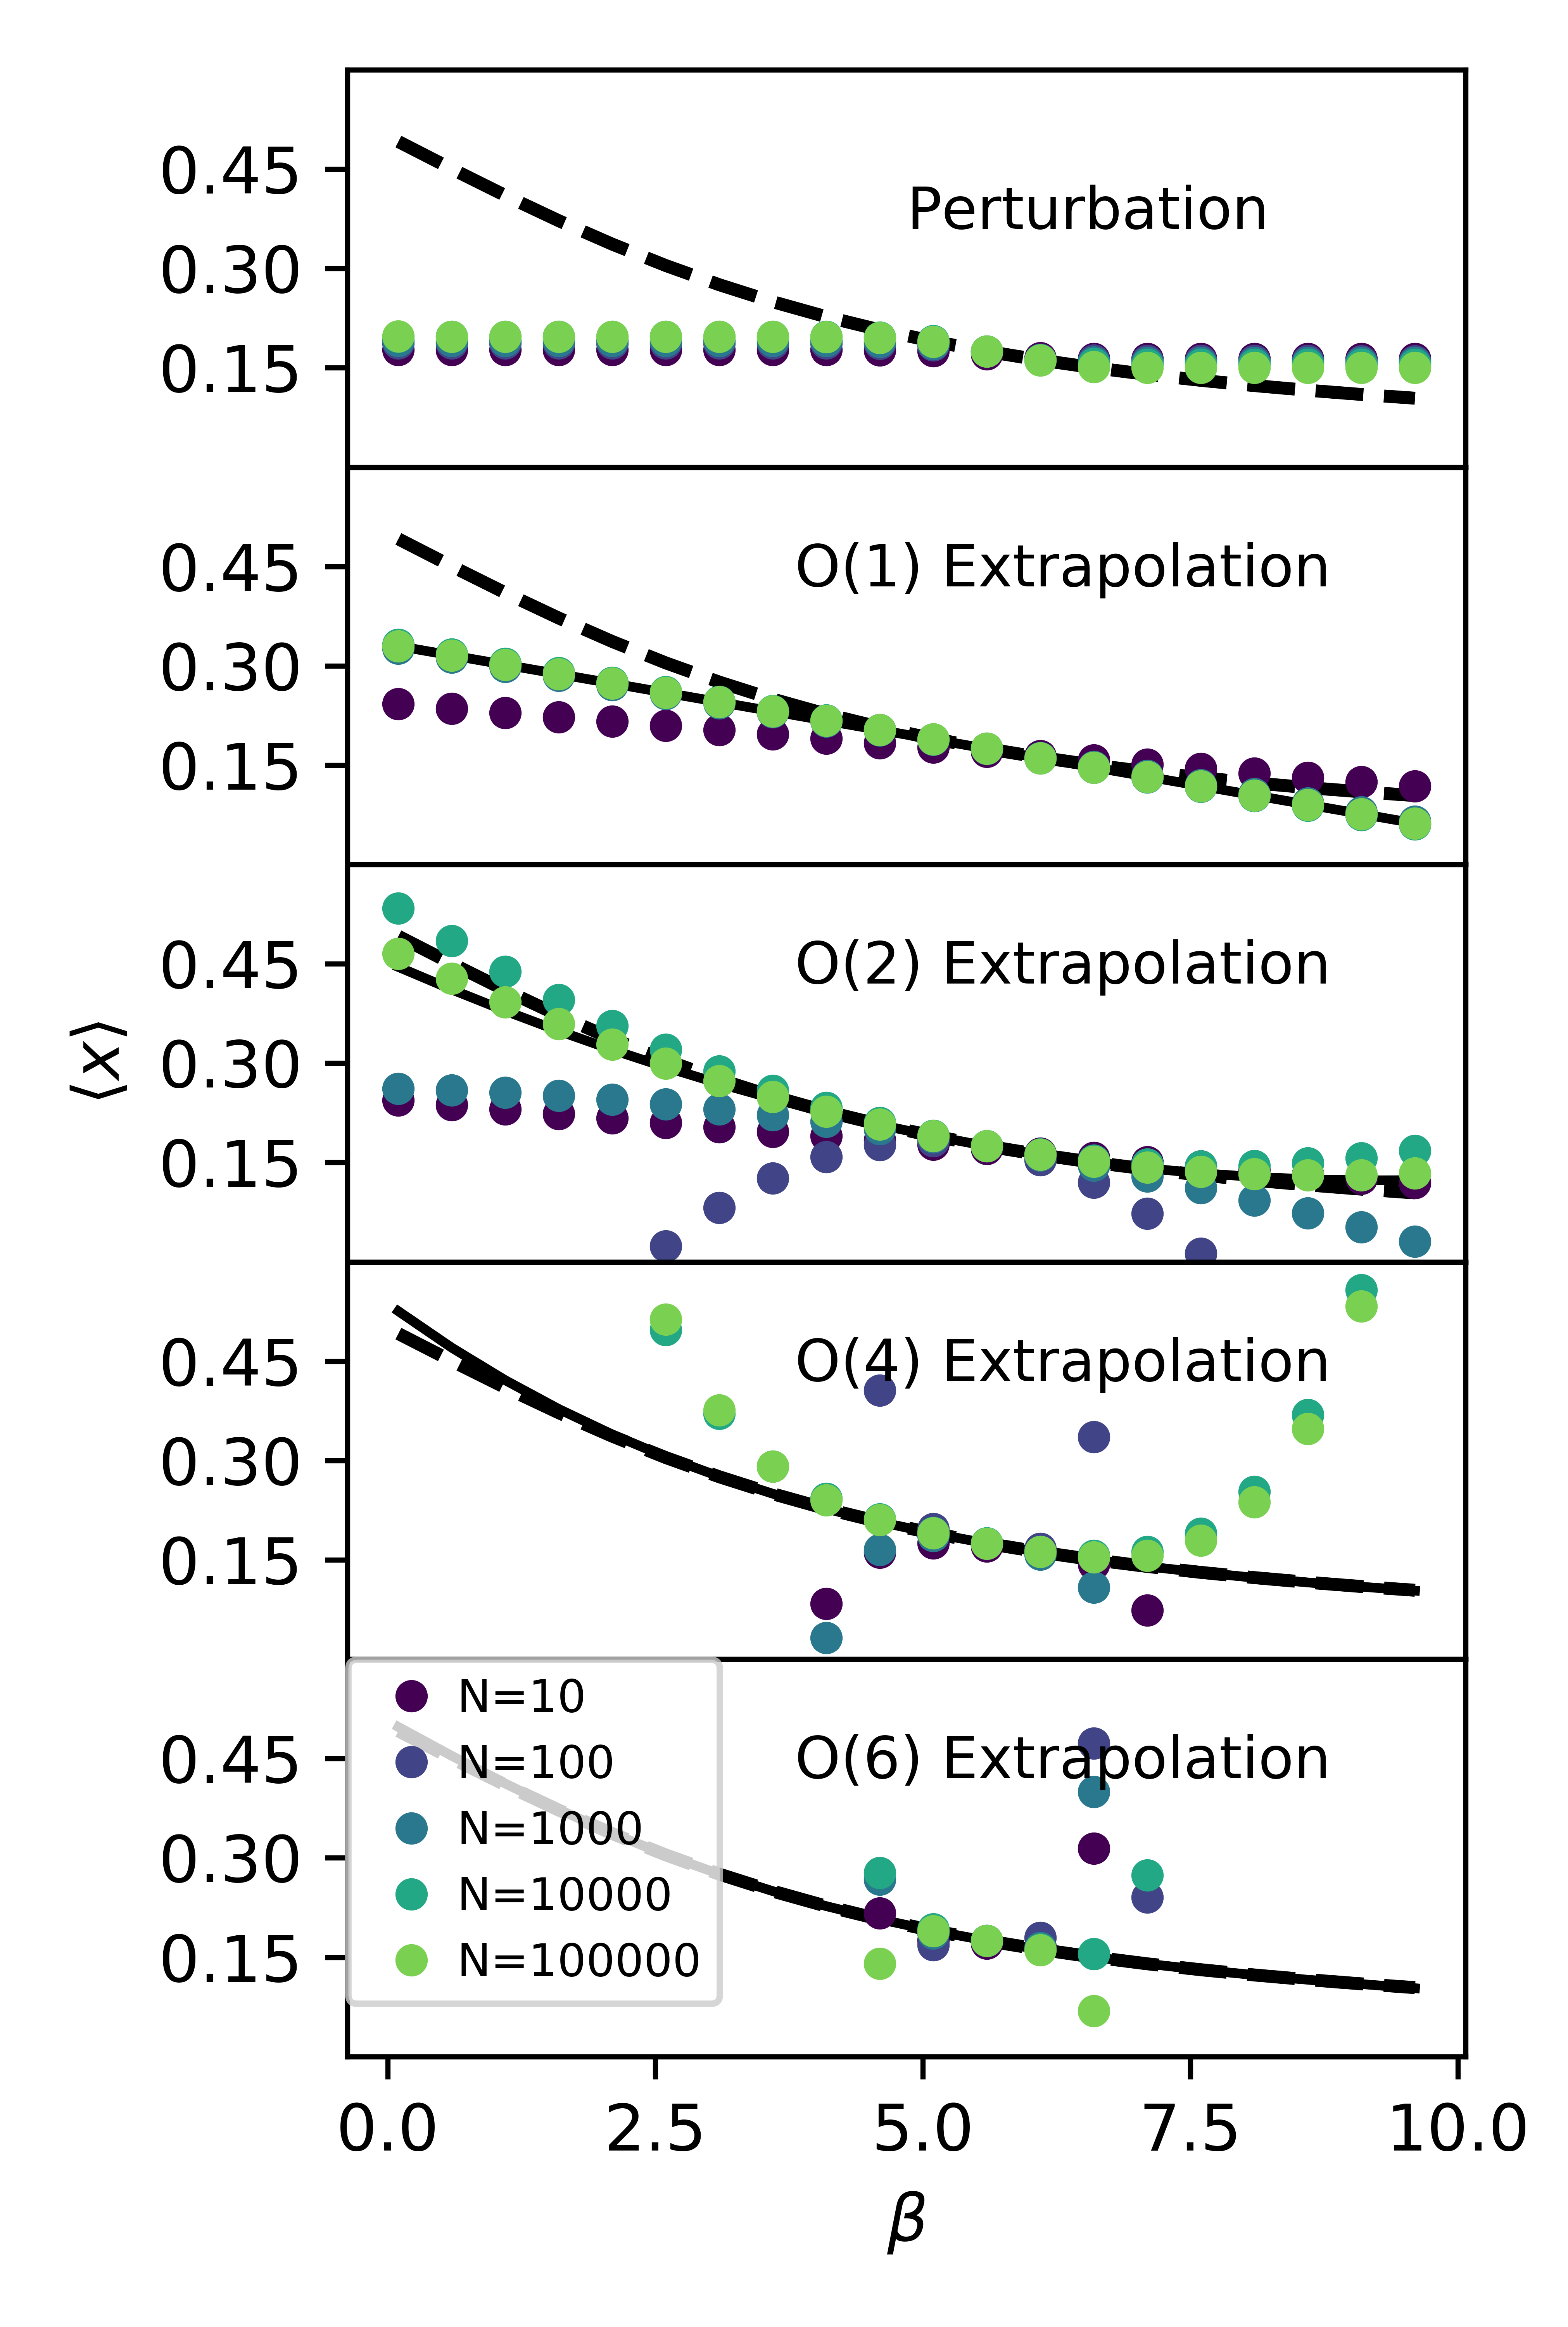

True extrapolation coeffiecients: [ 0.17485984 -0.02816239  0.00763547 -0.00229234  0.00043704  0.00025699
 -0.0004418 ]
	 With N_configs =     10: [ 1.70531125e-01 -1.30323486e-02  1.11598444e-04  2.55986088e-02
 -4.35759068e-01  6.92848969e+00  8.13081055e+01]
	 With N_configs =    100: [ 1.74619964e-01 -2.84129390e-02 -5.24734867e-02 -3.95817957e-02
  5.33488247e+00  7.89407425e+01 -3.74896484e+02]
	 With N_configs =   1000: [ 1.75080911e-01 -2.74799867e-02 -4.27252627e-03 -5.58745104e-03
 -8.63963515e-01  1.13534775e+01  1.41422852e+02]
	 With N_configs =  10000: [ 1.74896450e-01 -2.85440711e-02  1.33550497e-02  4.77539818e-03
  5.86529672e-02 -4.00429153e+00  2.30712891e+01]
	 With N_configs = 100000: [ 1.74870524e-01 -2.81639871e-02  8.95721620e-03  4.21003439e-04
  6.38331473e-02 -9.14424896e-01 -5.56181641e+01]


In [4]:
#Compare both perturbation and extrapolation to their analytical results

%matplotlib notebook

#Define reference beta and generate all the data we could want
refBeta = betavals[11]
xdata, udata = mIG.genData(refBeta, nConfigs=100000)

#Define orders to extrapolate to
extOrders = [1,2,4,6]

fig, ax = plt.subplots(len(extOrders)+1, sharex=True, sharey=True, figsize=(3.37,5), dpi=600)

#nsampvals = np.geomspace(10, len(xdata), num=4, dtype=int)
nsampvals = np.array((10.0*np.ones(5))**np.arange(1,6), dtype=int)
nsampcolors = plt.cm.viridis(np.arange(0.0, 1.0, float(1.0/len(nsampvals))))

#First plot the analytical result
for a in ax:
    a.plot(betavals, mIG.avgX(betavals), 'k--', linewidth=2.0)

for j, o in enumerate(extOrders):
    trueExtrap, trueDerivs = mIG.extrapAnalytic(betavals, refBeta, o)
    ax[j+1].plot(betavals, trueExtrap, 'k-')
    if j == len(extOrders)-1:
        print('True extrapolation coeffiecients: %s'%str(trueDerivs))

#Train extrapolation and perturbation models with the full dataset
extModel = ExtrapModel(refB=refBeta, xData=xdata, uData=udata, maxOrder=extOrders[-1])
pertModel = PerturbModel(refB=refBeta, xData=xdata, uData=udata)

for i, n in enumerate(nsampvals):
    thisinds = np.random.choice(len(xdata), size=n, replace=False)
    
    #Get parameters for extrapolation model with this data by training it - the parameters are the derivatives
    thisext = extModel.train(refBeta, xdata[thisinds], udata[thisinds], saveParams=False)
    print('\t With N_configs = %6i: %s'%(n, str(thisext.flatten()))) #Have to flatten because observable is 1-D
    for j, o in enumerate(extOrders):
        dataExtrap = extModel.predict(betavals, params=thisext, order=o)
        ax[j+1].plot(betavals, dataExtrap, 'o', markersize=4, color=nsampcolors[i], label='N=%i'%n)
    
    #And do the same thing for perturbation, but here the parameters are just the data
    thispert = pertModel.train(refBeta, xdata[thisinds], udata[thisinds], saveParams=False)
    dataPert = pertModel.predict(betavals, params=thispert)
    ax[0].plot(betavals, dataPert, 'o', markersize=4, color=nsampcolors[i])

ax[2].set_ylabel(r'$\langle x \rangle$')
ax[-1].set_xlabel(r'$\beta$')

ax[0].annotate('Perturbation', xy=(0.5, 0.6), xycoords='axes fraction', fontsize=9)
for j, o in enumerate(extOrders):
    ax[j+1].annotate('O(%i) Extrapolation'%(o), xy=(0.4, 0.7), xycoords='axes fraction', fontsize=9)

ax[-1].set_ylim((0.0, 0.6))
ax[-1].yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=4, prune='both'))
ax[-1].legend(borderaxespad=0.01, handletextpad=0.01, fontsize=7)

fig.tight_layout()
fig.subplots_adjust(hspace=0.0)

plt.show()


In each of the figures, the true behavior is shown as a thick dashed line, the analyitical result (infinite sampling) for each order of extrapolation is shown as a think solid line and the result with 10, 100, 1000, ... 100000 randomly sampled configurations is shown with purple (fewer samples) to green (more samples) circles. Perturbation works close to the reference temperature, but saturates far away. With more samples, it works further out, but the increases in accuracy are marginal. First order extrapolation quickly converges to the infinite sampling limit while second order takes more sampling to do so. The actual coefficients at each order of extrapolation are printed below. Since perturbation essentially refuses to provide an estimate past a certain distance in $\beta$, it is not reliable a certain distance out. Both first and second order extrapolation essentially get lucky here and remain highly accurate over very large temperature ranges. For higher order extrapolation, the analytical, infinite sampling result matches very closely with the true temperature dependence of $\langle x \rangle$. However, the finite-sampling results are in practice very poor due to difficulties in accurately estimating the higher-order moments of the potential energy distribution. The higher orders are actually quite accurate (if you try zooming in) close to the point we're extrapolating from, but the error grows very quickly as we move further away.

As far as I see it, the main difference between the methods is that for perturbation, there are good guidelines for knowing when it should or shouldn't work and checking to see how well it's working without actually running a ton more simulations. Extrapolation seems like a great idea, but we need similarly rigorous guidelines for its use. For instance, you definitely should not use second order with fewer than 1000 samples, and even for 1000 there is a more limited range of accuracy that should be characterized. Ideally, methods to assess uncertainty should utilize only a single simulation at a single state. Even for perturbation, however, at least two simulations are required to really do this rigorously. Things like MBAR greatly reduce the number of simulations you need to run, but will be limited by many of the same issues as perturbation theory - extrapolation may be way more efficient to get the same accuracy, but it will likely need better uncertainty estimates to be useful because it has a higher chance of being way off.

<IPython.core.display.Javascript object>


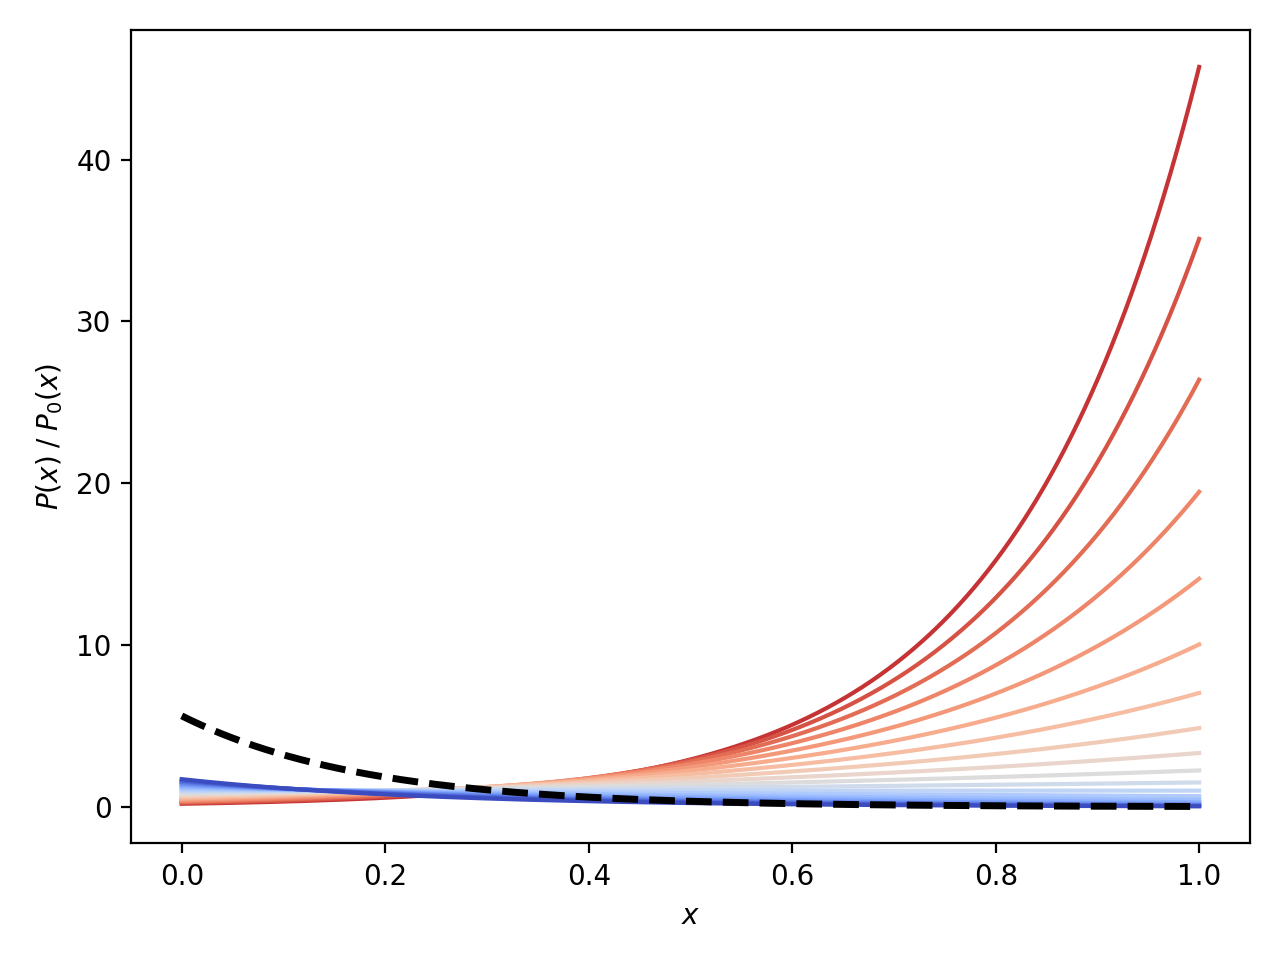

In [5]:
#To get a sense for when perturbation fails, we can look at ratios of probability distributions

%matplotlib notebook

fig, ax = plt.subplots()

for i, B in enumerate(betavals):
    ax.plot(xvals, mIG.PofX(xvals, B)/mIG.PofX(xvals, refBeta), color=bcolors[-(i+1)])

ax.plot(xvals, mIG.PofX(xvals, refBeta), 'k--', linewidth=2.5)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$P(x) \; / \; P_{0}(x)$')

fig.tight_layout()

plt.show()


The above shows the ratio of probabilities at the perturb temperature to the reference temperature and gives a better sense for why perturbation fails. Where the ratio of weights is large is where we need to sample because this is the part of phase space that is important to the state we're perturbing to that is not sampled in the reference state. It's also where the ratio of weights iteslf will contribute the most to its average. This is critical because perturbation relies on accurately computing both the average of the quantity of interest multiplied by the weight ratio (the numerator) and the weight ratio itself (the denominator). If we compare to the reference $P(x)$ (shown as a dashed line), we see that where we actually sample configurations from is nowhere close to what's important in the ratio of weights. Perturbation is then the same as only averaging (integrating) the ratio up to a certain point, limited by sampling. By truncating at that point, you don't get a good estimate of the true average of the ratio of weights. You also can't possibly get a good estimate of the numerator in perturbation, which is the average of the quantity of interest multiplied by the ratio of weights. Perturbation effectively tries to compensate for sampling from the wrong region by multiplying the observable of interest by the ratio of weights when averaging. This still won't be enough because you can't accurately estimate the ratio of weights if you don't sample fully. The end result is that you just get stuck with configurations you have and your estimate won't change even as you move further away.

Done with 10 samples
Done with 100 samples
Done with 1000 samples
Done with 10000 samples
Done with 100000 samples


<IPython.core.display.Javascript object>


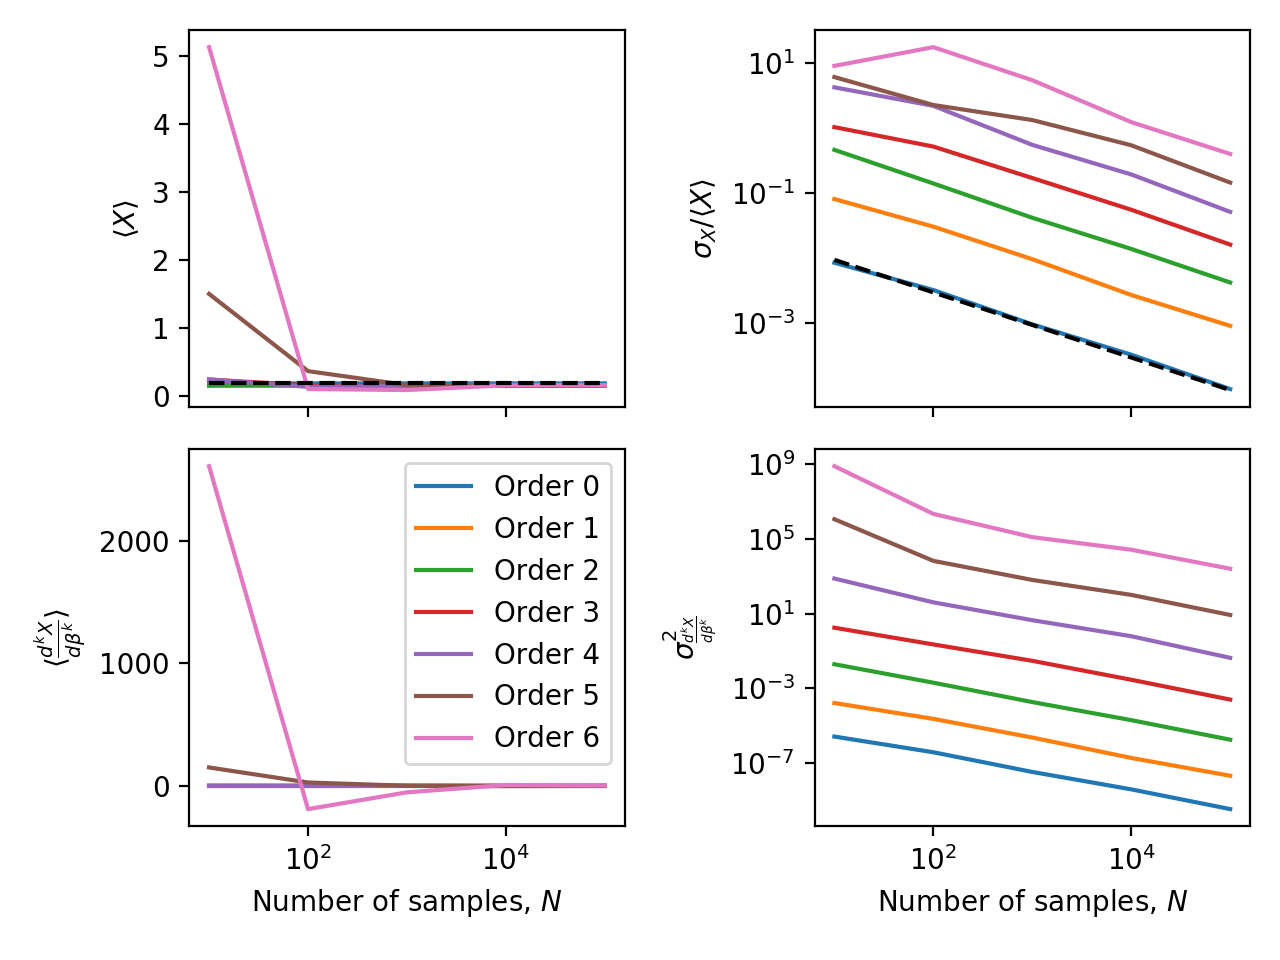

<IPython.core.display.Javascript object>


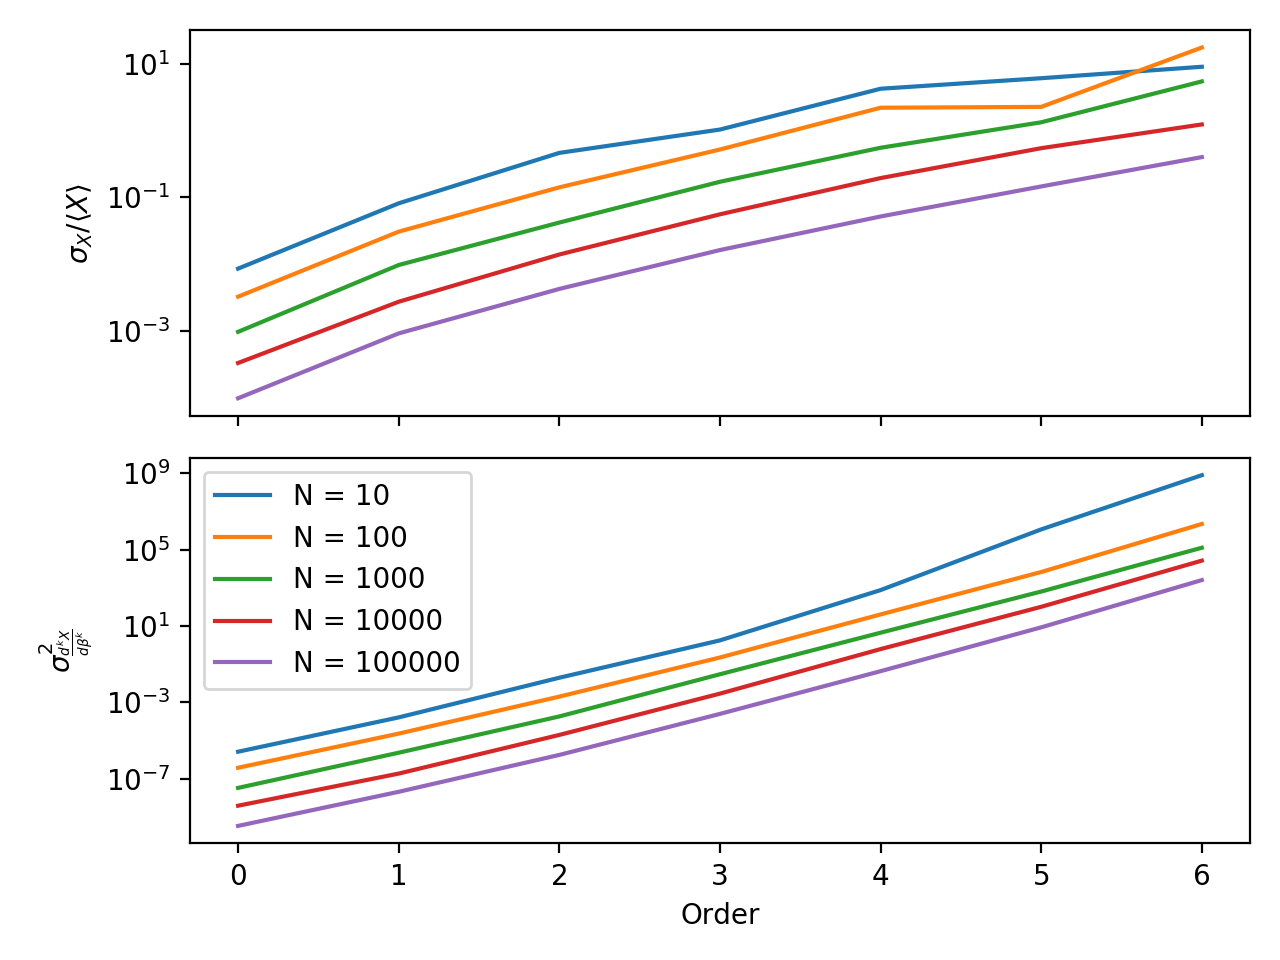

<IPython.core.display.Javascript object>


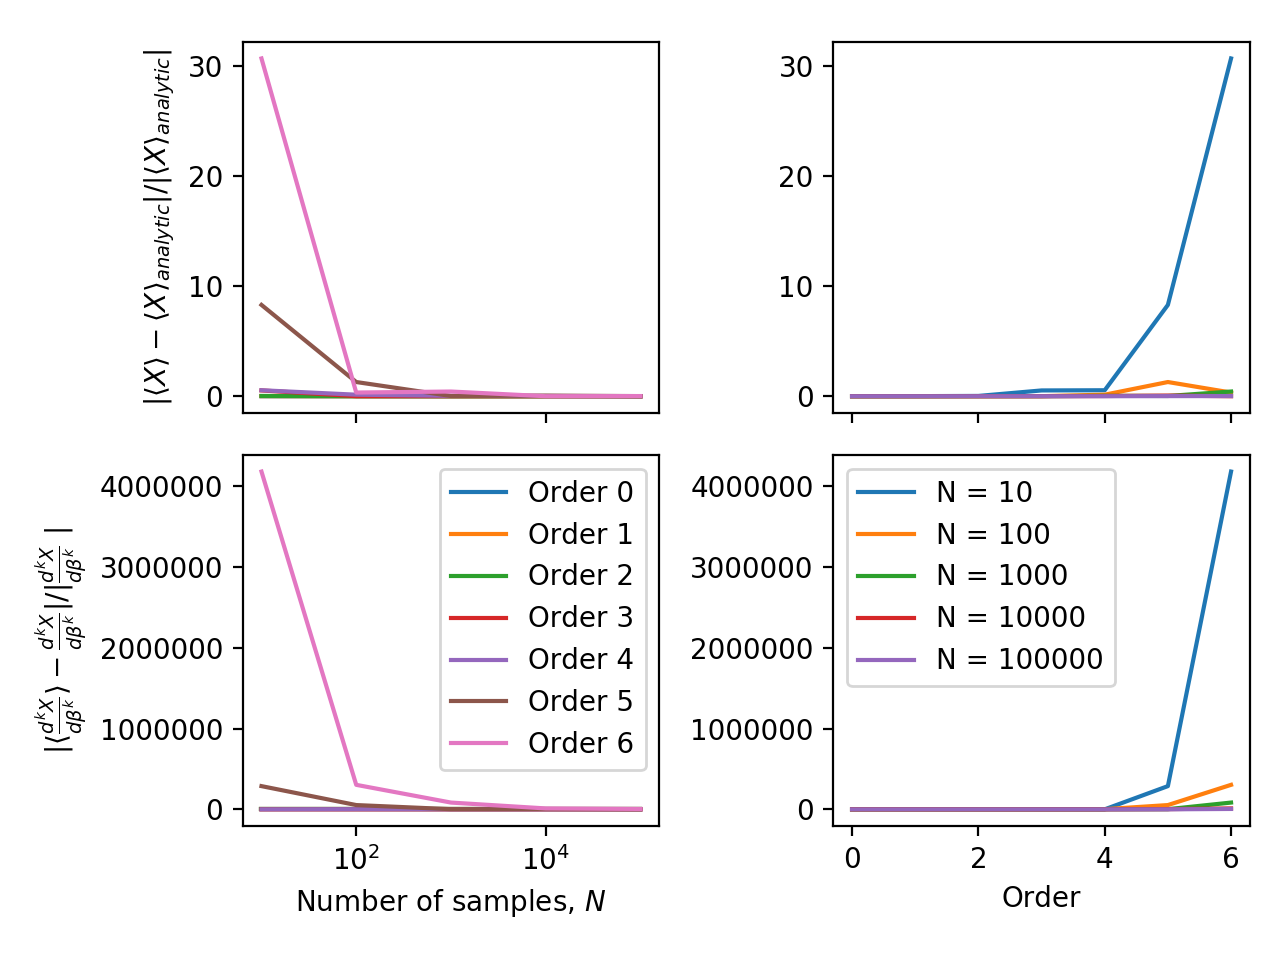

At order 0
	Extrap relative uncertainty vs N slope: -0.487566 (R^2 = -0.999340)
	Deriv variance vs N slope:  -0.975071 (R^2 = -0.999338)
At order 1
	Extrap relative uncertainty vs N slope: -0.494543 (R^2 = -0.999177)
	Deriv variance vs N slope:  -0.987839 (R^2 = -0.999207)
At order 2
	Extrap relative uncertainty vs N slope: -0.508011 (R^2 = -0.999894)
	Deriv variance vs N slope:  -1.008482 (R^2 = -0.999938)
At order 3
	Extrap relative uncertainty vs N slope: -0.457924 (R^2 = -0.995539)
	Deriv variance vs N slope:  -0.958453 (R^2 = -0.999074)
At order 4
	Extrap relative uncertainty vs N slope: -0.487928 (R^2 = -0.994816)
	Deriv variance vs N slope:  -1.030140 (R^2 = -0.997818)
At order 5
	Extrap relative uncertainty vs N slope: -0.385980 (R^2 = -0.989942)
	Deriv variance vs N slope:  -1.207318 (R^2 = -0.977404)
At order 6
	Extrap relative uncertainty vs N slope: -0.385733 (R^2 = -0.913126)
	Deriv variance vs N slope:  -1.289647 (R^2 = -0.965217)
For 10 samples:
	Extrap relative uncertai

In [5]:
#Now want a good sense for how the error scales with the number of samples for extrapolation
#Want this for each coefficient and overall
#And we want to look seperately at uncertainty and actual error from the analytical result

#SHOULD ADD TRUE VARIANCE TO EACH PLOT AS A REFERENCE (have it, so why not?)
#(will be variance in infinite sampling, infinite order limit)

from scipy.stats import linregress

def getStatsExtrap(eModel, nPulls=1000, nSamples=10000, B=6.1, refB=5.1):
    #Must provide an extrapolation model with the highest-desired maximum order specified
    
    dB = B - refB
    extVals = np.zeros((nPulls, eModel.maxOrder+1))
    derivVals = np.zeros((nPulls, eModel.maxOrder+1))
        
    for i in range(nPulls):
        
        x, U = mIG.genData(refB, nConfigs=nSamples)
        
        thisext = eModel.train(refB, x, U)
        derivVals[i,:] = thisext.flatten()
        
        for o in range(eModel.maxOrder+1):
            extVals[i,o] = eModel.predict(B, params=thisext, order=o)
                
    extAvg = np.average(extVals, axis=0)
    extVar = np.var(extVals, ddof=1, axis=0)
    derivAvg = np.average(derivVals, axis=0)
    derivVar = np.var(derivVals, ddof=1, axis=0)

    return extAvg, extVar, derivAvg, derivVar

maxOrder = 6

nsampvals = np.array((10.0*np.ones(5))**np.arange(1,6), dtype=int)

extStatsVN = np.zeros((len(nsampvals), 2, maxOrder+1))
derivStatsVN = np.zeros((len(nsampvals), 2, maxOrder+1))

#Create generic extrapolation model to work with
extModel = ExtrapModel(maxOrder=maxOrder)

for i, n in enumerate(nsampvals):
    
    thisExtAvg, thisExtVar, thisDerivAvg, thisDerivVar = getStatsExtrap(extModel, nPulls=100, nSamples=n)
    extStatsVN[i,0,:] = thisExtAvg
    extStatsVN[i,1,:] = thisExtVar
    derivStatsVN[i,0,:] = thisDerivAvg
    derivStatsVN[i,1,:] = thisDerivVar
    
    print("Done with %i samples"%n)

varFig, varAx = plt.subplots(2, 2, sharex=True, sharey=False)

ordFig, ordAx = plt.subplots(2, sharex=True, sharey=False)

absFig, absAx = plt.subplots(2, 2, sharex='col', sharey=False)

trueExt = np.zeros(maxOrder+1)

for o in range(maxOrder+1):
    
    print('At order %i'%o)
    
    varAx[0,0].plot(nsampvals, extStatsVN[:,0,o], label='Order %i'%(o))
    varAx[0,1].plot(nsampvals, abs(np.sqrt(extStatsVN[:,1,o])/extStatsVN[:,0,o]), label='Order %i'%(o))
    varAx[1,0].plot(nsampvals, derivStatsVN[:,0,o], label='Order %i'%(o))
    varAx[1,1].plot(nsampvals, derivStatsVN[:,1,o], label='Order %i'%(o))
    
    extVarReg = linregress(np.log(nsampvals), np.log(abs(np.sqrt(extStatsVN[:,1,o])/extStatsVN[:,0,o])))
    derivVarReg = linregress(np.log(nsampvals), np.log(derivStatsVN[:,1,o]))
    
    print('\tExtrap relative uncertainty vs N slope: %f (R^2 = %f)'%(extVarReg.slope, extVarReg.rvalue))
    print('\tDeriv variance vs N slope:  %f (R^2 = %f)'%(derivVarReg.slope, derivVarReg.rvalue))
    
    trueExtrap, trueDerivs = mIG.extrapAnalytic(6.1, 5.1, o)
    absAx[0,0].plot(nsampvals, abs((extStatsVN[:,0,o] - trueExtrap)/trueExtrap), label='Order %i'%(o))
    absAx[1,0].plot(nsampvals, abs((derivStatsVN[:,0,o] - trueDerivs[o])/trueDerivs[o]), label='Order %i'%(o))
    trueExt[o] = trueExtrap
    
for i in range(len(nsampvals)):

    print('For %i samples:'%(nsampvals[i]))
    
    ordAx[0].plot(np.arange(maxOrder+1), abs(np.sqrt(extStatsVN[i,1,:])/extStatsVN[i,0,:]), label='N = %i'%(nsampvals[i]))
    ordAx[1].plot(np.arange(maxOrder+1), derivStatsVN[i,1,:], label='N = %i'%(nsampvals[i]))
    
    extVarReg = linregress(np.arange(maxOrder+1), np.log(abs(np.sqrt(extStatsVN[i,1,:])/extStatsVN[i,0,:])))
    derivVarReg = linregress(np.arange(maxOrder+1), np.log(derivStatsVN[i,1,:]))
    
    print('\tExtrap relative uncertainty vs order slope: %f (R^2 = %f)'%(extVarReg.slope, extVarReg.rvalue))
    print('\tDeriv variance vs order slope:  %f (R^2 = %f)'%(derivVarReg.slope, derivVarReg.rvalue))
    
    trueExtrap, trueDerivs = mIG.extrapAnalytic(6.1, 5.1, maxOrder)
    absAx[0,1].plot(np.arange(maxOrder+1), abs((extStatsVN[i,0,:] - trueExt)/trueExt), label='N = %i'%(nsampvals[i]))
    absAx[1,1].plot(np.arange(maxOrder+1), abs((derivStatsVN[i,0,:] - trueDerivs)/trueDerivs), label='N = %i'%(nsampvals[i]))       

#Also plot some true values for reference
trueX = mIG.avgX(5.1) #True average
trueStd = np.sqrt(mIG.varX(5.1) / mIG.nP) #True std in the average position, X, for a SINGLE configuration
varAx[0,0].plot(nsampvals[[0,-1]], [trueX]*2, 'k--')
varAx[0,1].plot(nsampvals, abs(trueStd/trueX)/np.sqrt(nsampvals), 'k--')

varAx[1,0].set_xlabel(r'Number of samples, $N$')
varAx[1,1].set_xlabel(r'Number of samples, $N$')
varAx[0,0].set_ylabel(r'$\langle X \rangle$')
varAx[1,0].set_ylabel(r'$\langle \frac{d^k X}{d \beta^k} \rangle$')
varAx[0,1].set_ylabel(r'$\sigma_{X} / \langle X \rangle$')
varAx[1,1].set_ylabel(r'$\sigma_{\frac{d^k X}{d \beta^k}}^2$')

# for i in range(varAx.shape[0]):
#     for j in range(varAx.shape[1]):
#         varAx[i,j].set_yscale('log')
#         varAx[i,j].set_xscale('log')
for ax in varAx[:,1]:
    ax.set_yscale('log')
    ax.set_xscale('log')

varAx[1,0].legend()

varFig.tight_layout()

ordAx[-1].set_xlabel(r'Order')
ordAx[0].set_ylabel(r'$\sigma_{X} / \langle X \rangle$')
ordAx[1].set_ylabel(r'$\sigma_{\frac{d^k X}{d \beta^k}}^2$')

for ax in ordAx:
    ax.set_yscale('log')
    
ordAx[1].legend()

ordFig.tight_layout()

absAx[1,0].set_xlabel(r'Number of samples, $N$')
absAx[1,1].set_xlabel(r'Order')
absAx[0,0].set_ylabel(r'$| \langle X \rangle - \langle X \rangle_{analytic} | / | \langle X \rangle_{analytic} |$')
absAx[1,0].set_ylabel(r'$| \langle \frac{d^k X}{d \beta^k} \rangle - \frac{d^k X}{d \beta^k} | / | \frac{d^k X}{d \beta^k}$ |')

for ax in absAx[:,0]:
    ax.set_xscale('log')

absAx[1,0].legend()
absAx[1,1].legend()

absFig.tight_layout()

plt.show()


Above we show how the variance of an extrapolation estimate and the variance of derivatives of various order scale with a fixed $\delta \beta$ of 1.0 (reference of 5.1 and extrapolating to 6.1). It's clear that both variances scale exactly as expected with the number of samples or configurations (inversely as $1/N$). 

What is more interesting is that both also vary linearly with extrapolation order. Unfortunately, I have not been able to derive an appropriate model for the variance as a function of order. The approach I've taken is trying to model each derivative's variance, then apply standard error propagation. Slopes are significantly overestimated (factors of at least 2) if it is argued that the variance of a certain order derivative is propotional to the variance of the potential energy raised to a power of the same order. The two models I have tried are $\sigma_k^2 = \frac{n_{dof}^{2k}}{N} \sigma_x^2$ and $\sigma_k^2 = \frac{\sigma_{U^k, Norm}^2}{N}$ (see collapsed codeblock below). $k$ is the order, $n_{dof}$ is the number of degrees of freedom, $N$ is the number of configurations or simulation snapshots, $\sigma_x^2$ is the variance in the observable of interest, and $\sigma_{U^k, Norm}^2$ is the variance of the potential energy raised to the $k^{th}$ power assuming a normal distribution of the potential energy (this is essentially exactly correct at large numbers of particles for the ideal gas case studied here). Again, both overstimate the slope by nearly a factor of 2.5 for the variance of the derivatives versus order (at fixed number of samples). It would be nice to have an approximate general model, but it may just be enough to know that changing order can change accuracy exponentially because the uncertainty in the derivatives involved scales this way. 

Also shown are absolute relative errors from the true extrapolation and derivatives if sampling was infinite. These are highly non-linear functions of both the number of samples and the order.

<IPython.core.display.Javascript object>


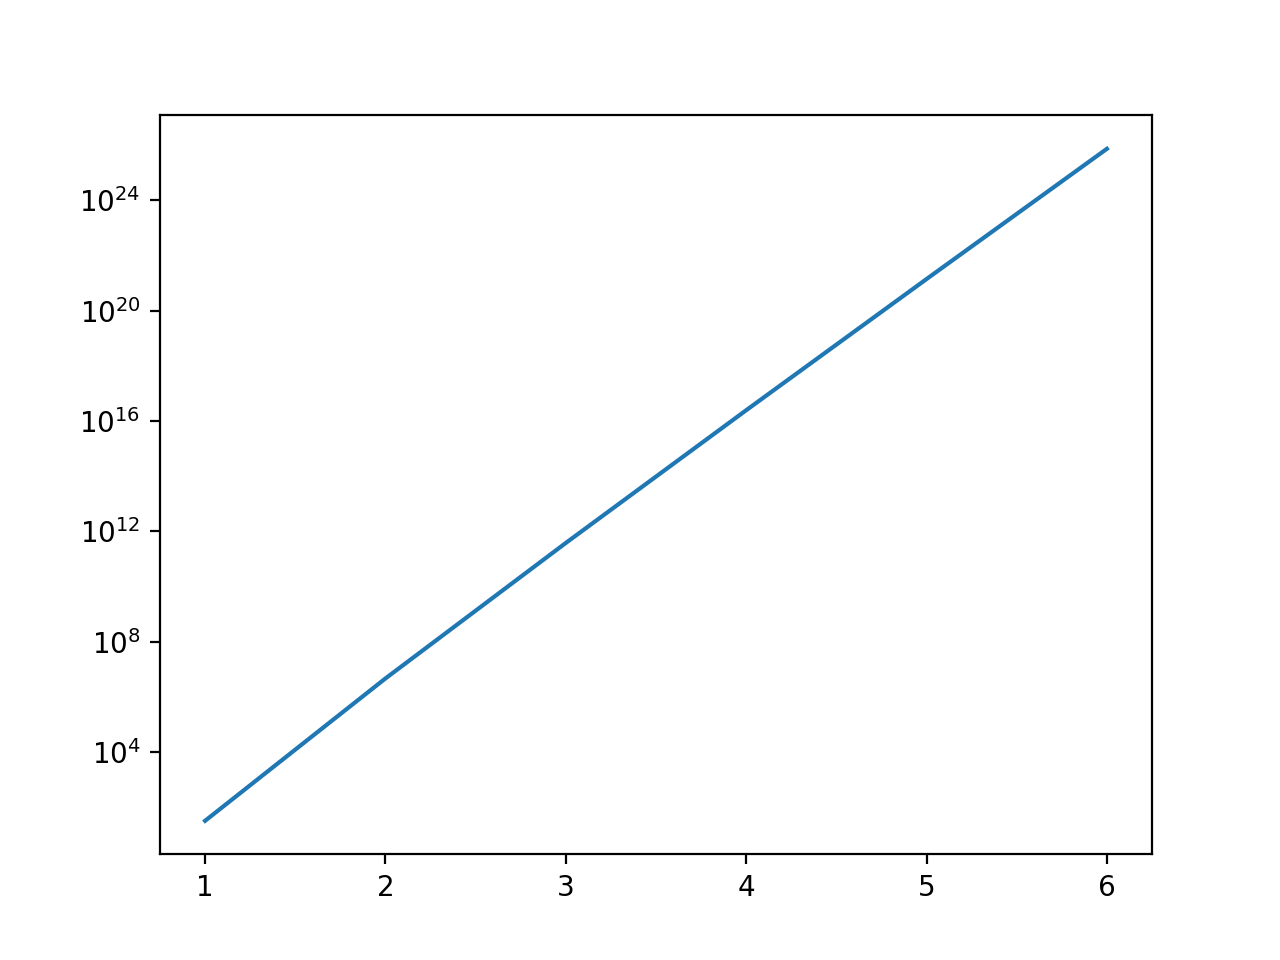

32.27497862363816
4659857.470427036
379459332576.02344
2.448002701313536e+16
1.3917340588444662e+21
7.31130109304767e+25

Gaussian moment variance vs order slope: 11.184698 (R^2 = 0.999875)


In [7]:
normU = norm(loc=mIG.nP*mIG.avgX(5.1), scale=np.sqrt(mIG.nP*mIG.varX(5.1)))

def stdMoment(normObj, k):
    sqmoment = normObj.moment(2*k)
    momentsq = normObj.moment(k)**2
    return (sqmoment - momentsq)

fig, ax = plt.subplots()

allstd = np.zeros(maxOrder)

for o in range(1, maxOrder+1):
    print(stdMoment(normU, o))
    allstd[o-1] = stdMoment(normU, o)
    #allstd[o-1] = nParticles**(2.0*o)
    
ax.plot(np.arange(1, maxOrder+1), allstd)

varreg = linregress(np.arange(1, maxOrder+1), np.log(allstd))    
print('\nGaussian moment variance vs order slope: %f (R^2 = %f)'%(varreg.slope, varreg.rvalue))

ax.set_yscale('log')

plt.show()


Done with beta 0.100000
Done with beta 0.600000
Done with beta 1.100000
Done with beta 1.600000
Done with beta 2.100000
Done with beta 2.600000
Done with beta 3.100000
Done with beta 3.600000
Done with beta 4.100000
Done with beta 4.600000
Done with beta 5.100000
Done with beta 5.600000
Done with beta 6.100000
Done with beta 6.600000
Done with beta 7.100000
Done with beta 7.600000
Done with beta 8.100000
Done with beta 8.600000
Done with beta 9.100000
Done with beta 9.600000


<IPython.core.display.Javascript object>


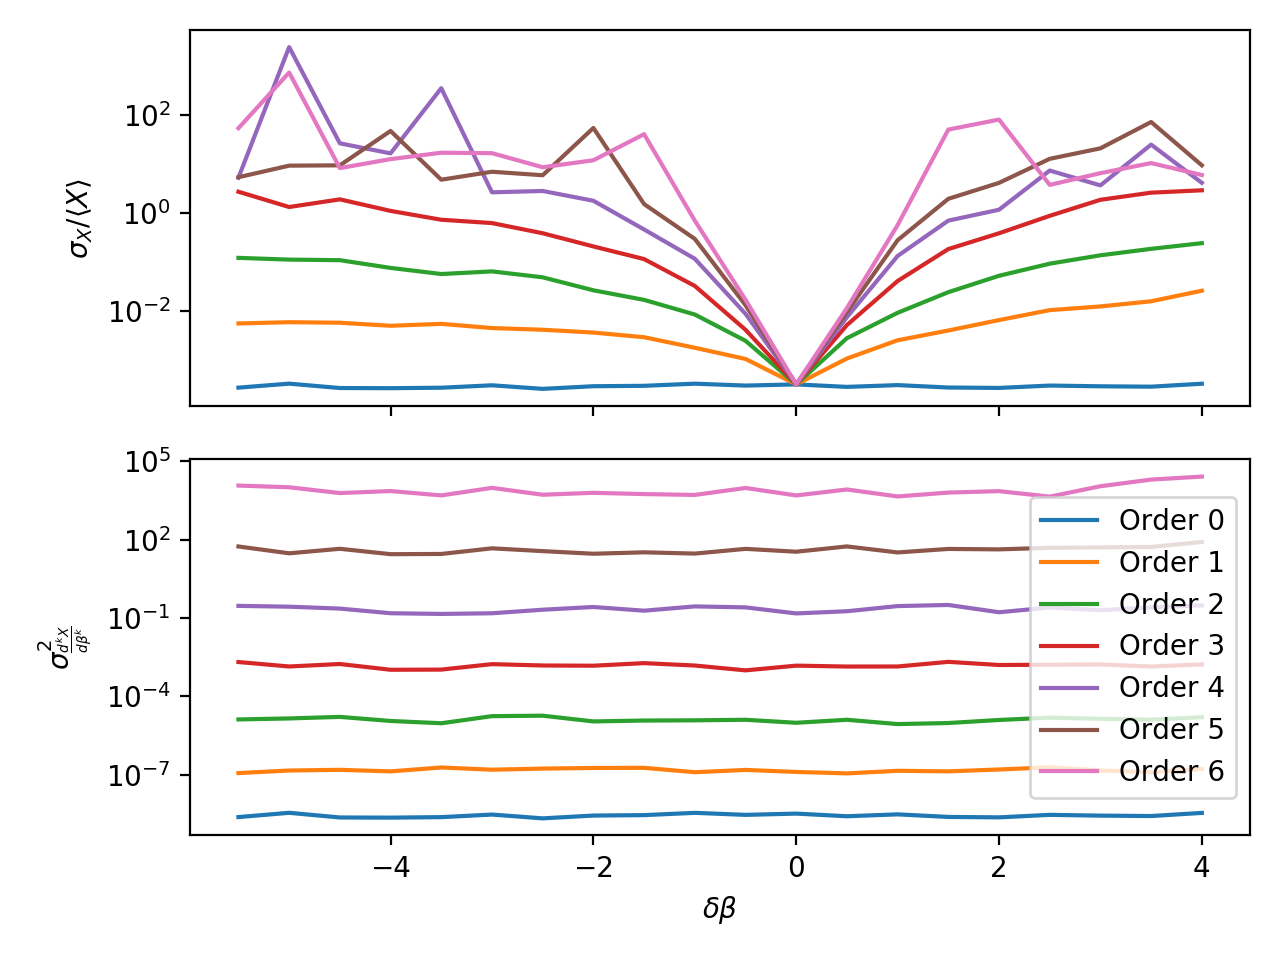

In [6]:
#Also check uncertainty as a function of beta (use max samples, but change order)
extStatsVB = np.zeros((len(betavals), 2, maxOrder+1))
derivStatsVB = np.zeros((len(betavals), 2, maxOrder+1))

for i, beta in enumerate(betavals):
    
    thisExtAvg, thisExtStd, thisDerivAvg, thisDerivStd = getStatsExtrap(extModel, nPulls=50, nSamples=10000, 
                                                                        B=beta, refB=refBeta)
    extStatsVB[i,0,:] = thisExtAvg
    extStatsVB[i,1,:] = thisExtStd
    derivStatsVB[i,0,:] = thisDerivAvg
    derivStatsVB[i,1,:] = thisDerivStd
    
    print('Done with beta %f'%beta)

betaFig, betaAx = plt.subplots(2, sharex=True, sharey=False)

for o in range(maxOrder+1):
    
    trueExtrap, trueDerivs = mIG.extrapAnalytic(betavals, refBeta, o)
    
    #betaAx[0].plot(betavals-refBeta, abs(np.sqrt(extStatsVB[:,1,o])/trueExtrap), label='Order %i'%(o))
    #Rather than looking at how std compares to extapolation in infinite limit, dividing by empirical estimate
    #This way, plateau at around 10.0 because estimate and std both become very large and far from the true value
    betaAx[0].plot(betavals-refBeta, abs(np.sqrt(extStatsVB[:,1,o])/extStatsVB[:,0,o]), label='Order %i'%(o))
    betaAx[1].plot(betavals-refBeta, derivStatsVB[:,1,o], label='Order %i'%(o))

betaAx[-1].set_xlabel(r'$\delta \beta$')
betaAx[0].set_ylabel(r'$\sigma_{X} / \langle X \rangle$')
betaAx[1].set_ylabel(r'$\sigma_{\frac{d^k X}{d \beta^k}}^2$')

for ax in betaAx:
    ax.set_yscale('log')
    
betaAx[1].legend()

betaFig.tight_layout()

plt.show()


<IPython.core.display.Javascript object>


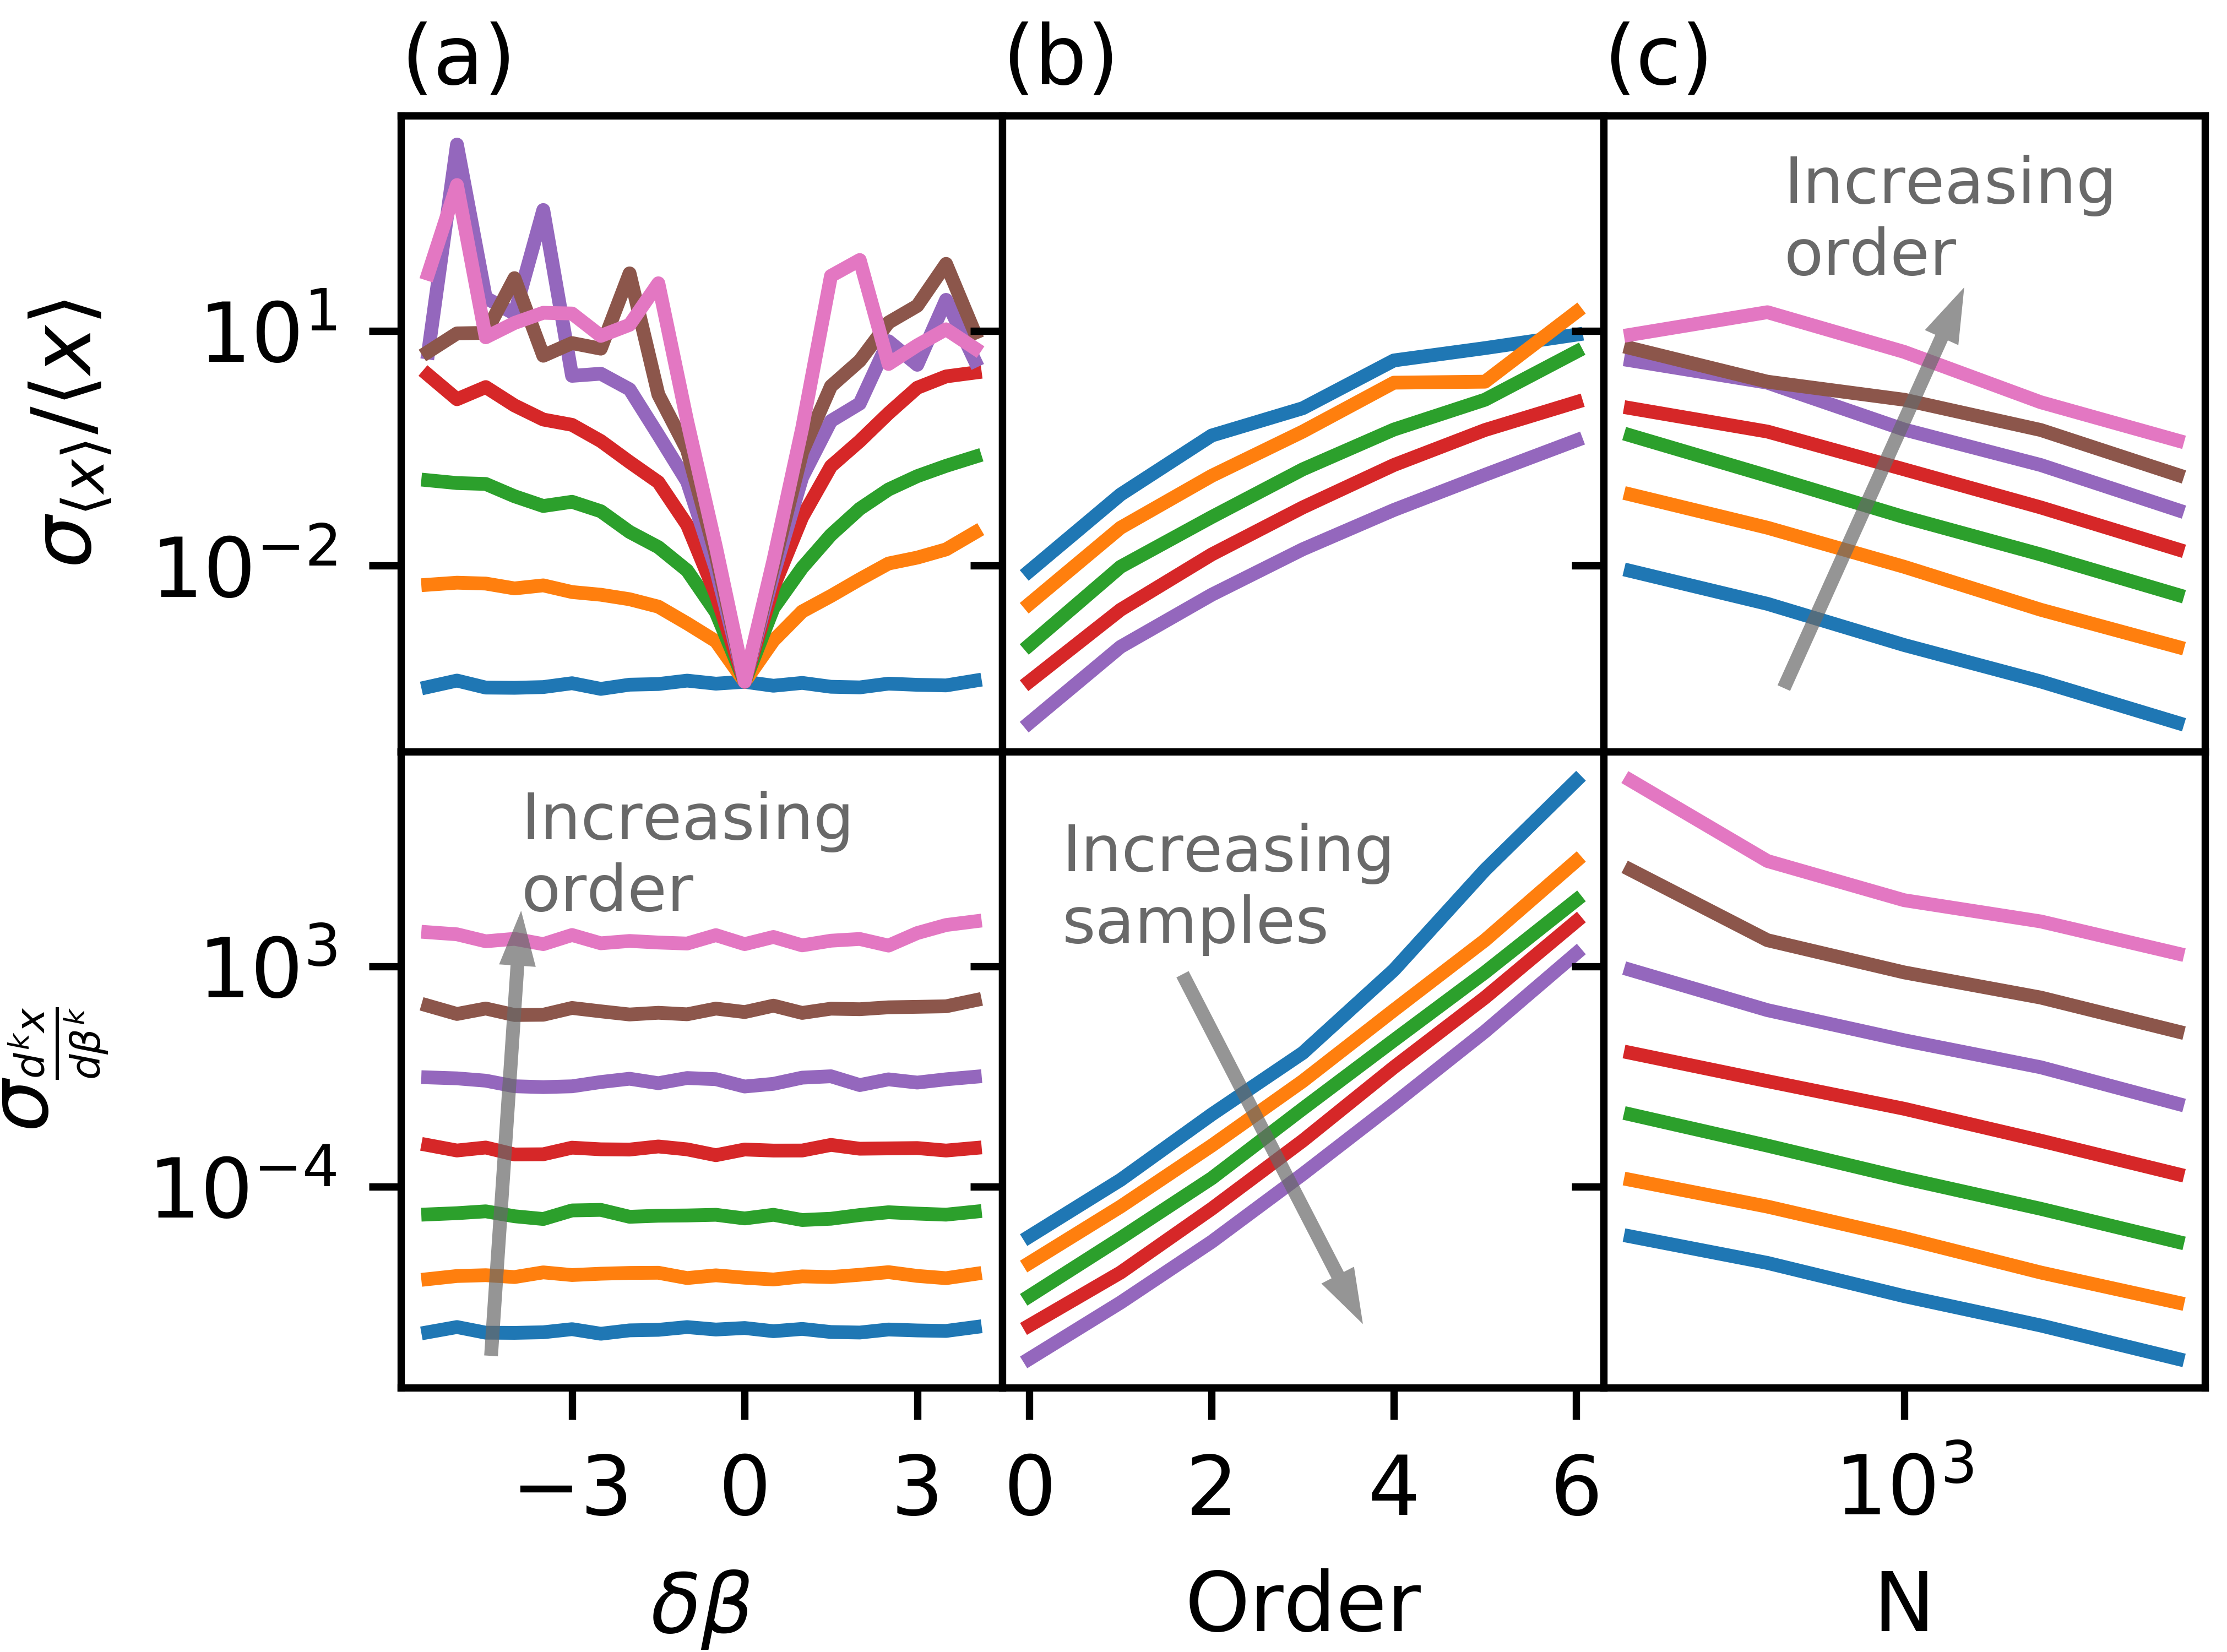

In [10]:
#Put together a nice plot summarizing all of the uncertainty analysis
allVarFig, allVarAx = plt.subplots(2, 3, sharex='col', sharey='row', figsize=(3.37,2.5), dpi=600)

for o in range(maxOrder+1):
    
    trueExtrap, trueDerivs = mIG.extrapAnalytic(betavals, refBeta, o)
    
    #betaAx[0].plot(betavals-refBeta, abs(np.sqrt(extStatsVB[:,1,o])/trueExtrap), label='Order %i'%(o))
    #Rather than looking at how std compares to extapolation in infinite limit, dividing by empirical estimate
    #This way, plateau at around 10.0 because estimate and std both become very large and far from the true value
    allVarAx[0,0].plot(betavals-refBeta, abs(np.sqrt(extStatsVB[:,1,o])/extStatsVB[:,0,o]), label='Order %i'%(o))
    allVarAx[1,0].plot(betavals-refBeta, derivStatsVB[:,1,o], label='Order %i'%(o))

    allVarAx[0,2].plot(nsampvals, abs(np.sqrt(extStatsVN[:,1,o])/extStatsVN[:,0,o]), label='Order %i'%(o))
    allVarAx[1,2].plot(nsampvals, derivStatsVN[:,1,o], label='Order %i'%(o))
    
for i in range(len(nsampvals)):
    
    allVarAx[0,1].plot(np.arange(maxOrder+1), abs(np.sqrt(extStatsVN[i,1,:])/extStatsVN[i,0,:]), label='N = %i'%(nsampvals[i]))
    allVarAx[1,1].plot(np.arange(maxOrder+1), derivStatsVN[i,1,:], label='N = %i'%(nsampvals[i]))

for i in range(allVarAx.shape[0]):
    for j in range(allVarAx.shape[1]):
        allVarAx[i,j].tick_params(axis='both', labelsize=9)
        allVarAx[i,j].xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=4, prune='both'))
        allVarAx[i,j].yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=8, prune='both'))
        allVarAx[i,j].set_yscale('log')
        if j == 2:
            allVarAx[i,j].set_xscale('log')

allVarAx[0,0].set_ylabel(r'$\sigma_{\langle x \rangle} / \langle x \rangle$', fontsize=9)
allVarAx[1,0].set_ylabel(r'$\sigma_{\frac{d^k x}{d \beta^k}}^2$', fontsize=9)
allVarAx[1,0].set_xlabel(r'$\delta \beta$', fontsize=9)
allVarAx[1,1].set_xlabel(r'Order', fontsize=9)
allVarAx[1,2].set_xlabel(r'N', fontsize=9)

allVarAx[0,0].annotate('(a)', xy=(0.0,1.05), xycoords='axes fraction', fontsize=9)
allVarAx[0,1].annotate('(b)', xy=(0.0,1.05), xycoords='axes fraction', fontsize=9)
allVarAx[0,2].annotate('(c)', xy=(0.0,1.05), xycoords='axes fraction', fontsize=9)

allVarAx[1,0].annotate('Increasing\norder', xy=(0.2,0.75), xycoords='axes fraction', color='dimgray', fontsize=7)
allVarAx[1,0].annotate('', xy=(0.2,0.75), xycoords='axes fraction', xytext=(0.15,0.05), textcoords='axes fraction',
                       arrowprops={'width':1.5, 'headwidth':4.0, 'headlength':6.0,
                                   'facecolor':'dimgray', 'linewidth':0.0, 'alpha':0.7})

allVarAx[1,1].annotate('Increasing\nsamples', xy=(0.1,0.7), xycoords='axes fraction', color='dimgray', fontsize=7)
allVarAx[1,1].annotate('', xy=(0.6,0.1), xycoords='axes fraction', xytext=(0.3,0.65), textcoords='axes fraction',
                       arrowprops={'width':1.5, 'headwidth':4.0, 'headlength':6.0,
                                   'facecolor':'dimgray', 'linewidth':0.0, 'alpha':0.7})

allVarAx[0,2].annotate('Increasing\norder', xy=(0.3,0.75), xycoords='axes fraction', color='dimgray', fontsize=7)
allVarAx[0,2].annotate('', xy=(0.6,0.73), xycoords='axes fraction', xytext=(0.3,0.1), textcoords='axes fraction',
                       arrowprops={'width':1.5, 'headwidth':4.0, 'headlength':6.0,
                                   'facecolor':'dimgray', 'linewidth':0.0, 'alpha':0.7})

allVarFig.tight_layout()
allVarFig.subplots_adjust(hspace=0.0, wspace=0.0, left=0.18, right=0.99, bottom=0.16, top=0.93)
    

Obviously the uncertainty in the extrapolated observable increases as we extrapolate further away. This is understood from standard error propagation as the value of $\delta \beta$ raised to the power of $k$ scaling the $k^{th}$ derivative. In this case, the standard deviation of the extrapolated observable should scale roughly as a polynomial in $\delta \beta$ - on a log-scale, though, this simply becomes logarithmic in $\delta \beta$. Note that the higher orders plateau to 10.0 only because very large values of the standard deviation also result in large magnitudes of the observable itself.

<IPython.core.display.Javascript object>


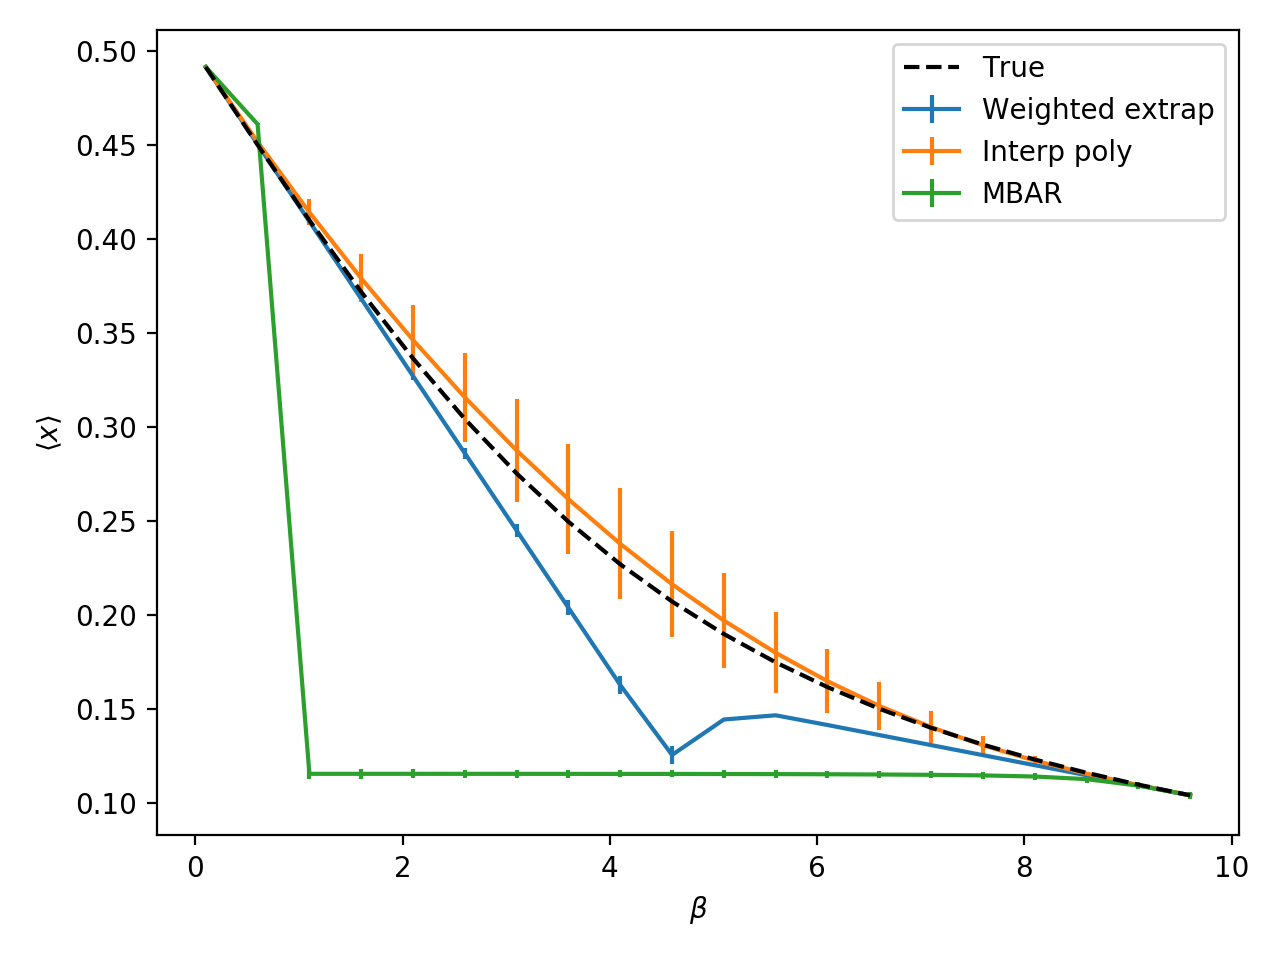

In [10]:
#Here we will compare interpolation strategies, using the case of only two input points
#Recursive implementation of interpolation will come later

iFig, iAx = plt.subplots()

xdata1, udata1 = mIG.genData(betavals[0], nConfigs=10000)
xdata2, udata2 = mIG.genData(betavals[-1], nConfigs=10000)
xData = np.array([xdata1, xdata2])
uData = np.array([udata1, udata2])

#Check weighted extrapolation, polynomial interpolation, and MBAR (really just BAR because have 2 points)
iModelExtW = ExtrapWeightedModel(refB=[betavals[0], betavals[-1]], xData=xData, uData=uData, maxOrder=2)
iModelPoly = InterpModel(refB=[betavals[0], betavals[-1]], xData=xData, uData=uData, maxOrder=2)
with np.errstate(invalid='ignore'):
    iModelMBAR = MBARModel(refB=[betavals[0], betavals[-1]], xData=xData, uData=uData, maxOrder=2)

#And plot results, using bootstrapped error on same dataset for each type of model
iAx.errorbar(betavals, iModelExtW.predict(betavals, order=1)[:,0], 
             yerr=iModelExtW.bootstrap(betavals, order=1)[:,0], label='Weighted extrap')
iAx.errorbar(betavals, iModelPoly.predict(betavals, order=1)[:,0], 
             yerr=iModelPoly.bootstrap(betavals, order=1)[:,0], label='Interp poly')
with np.errstate(invalid='ignore'):
    iAx.errorbar(betavals, iModelMBAR.predict(betavals, order=1)[:,0], 
                 yerr=iModelMBAR.bootstrap(betavals, order=1)[:,0], label='MBAR')
iAx.plot(betavals, mIG.avgX(betavals), 'k--', label='True', zorder=3)

iAx.set_xlabel(r'$\beta$')
iAx.set_ylabel(r'$\langle x \rangle$')
iAx.legend()

iFig.tight_layout()

plt.show()


The above compares weighted extrapolation (using the Minkowski-like distance that Nate proposed), polynomial interpolation, and MBAR (really just BAR because using only 2 points). Each method is used to interpolated between the two extreme values of beta. In all cases, the same data from the two edge points is used, making use of only derivatives up to 1st order for weighted extrapolation and interpolation. The error bars are one standard deviation from bootstrap resampling of the predictions of each model. True values are represented by the black dashed line. Using additional data points within the region and performing interpolation will result in qualitatively similar results for each subregion, even if all data points are used to inform the MBAR or interpolating polynomial models.

We don't really expect MBAR to do any better than perturbation because it is using the MBAR weights between states to reweight the perturbation theory estimates. As such, we can see that it is "sticky" in that it tries to keep using a single point until it suddenly jumps to the next one. This is a symptom of the fact that the perturbation theory estimates themselves plateau. Such plateaus represent poor overlap, resulting in large free energy differences and MBAR weights that essentially act as step functions (i.e. you just pick whichever point has lower free energy over the entire interval). Extrapolation is almost always better, but note that it's predictions vary more with sampling, especially if you go to higher order.


Interpolating from points 0.100000 and 9.600000
Recursion depth on this branch: 0
Maximum bootstrapped error within interval: 0.174825
Selected new extrapolation point: 4.753061

Interpolating from points 0.100000 and 4.753061
Recursion depth on this branch: 1
Maximum bootstrapped error within interval: 0.027707
Selected new extrapolation point: 2.284090

Interpolating from points 0.100000 and 2.284090
Recursion depth on this branch: 2
Maximum bootstrapped error within interval: 0.004449
No additional extrapolation points necessary on this interval.

Interpolating from points 2.284090 and 4.753061
Recursion depth on this branch: 2
Maximum bootstrapped error within interval: 0.005042
No additional extrapolation points necessary on this interval.

Interpolating from points 4.753061 and 9.600000
Recursion depth on this branch: 1
Maximum bootstrapped error within interval: 0.013347
No additional extrapolation points necessary on this interval.


<IPython.core.display.Javascript object>


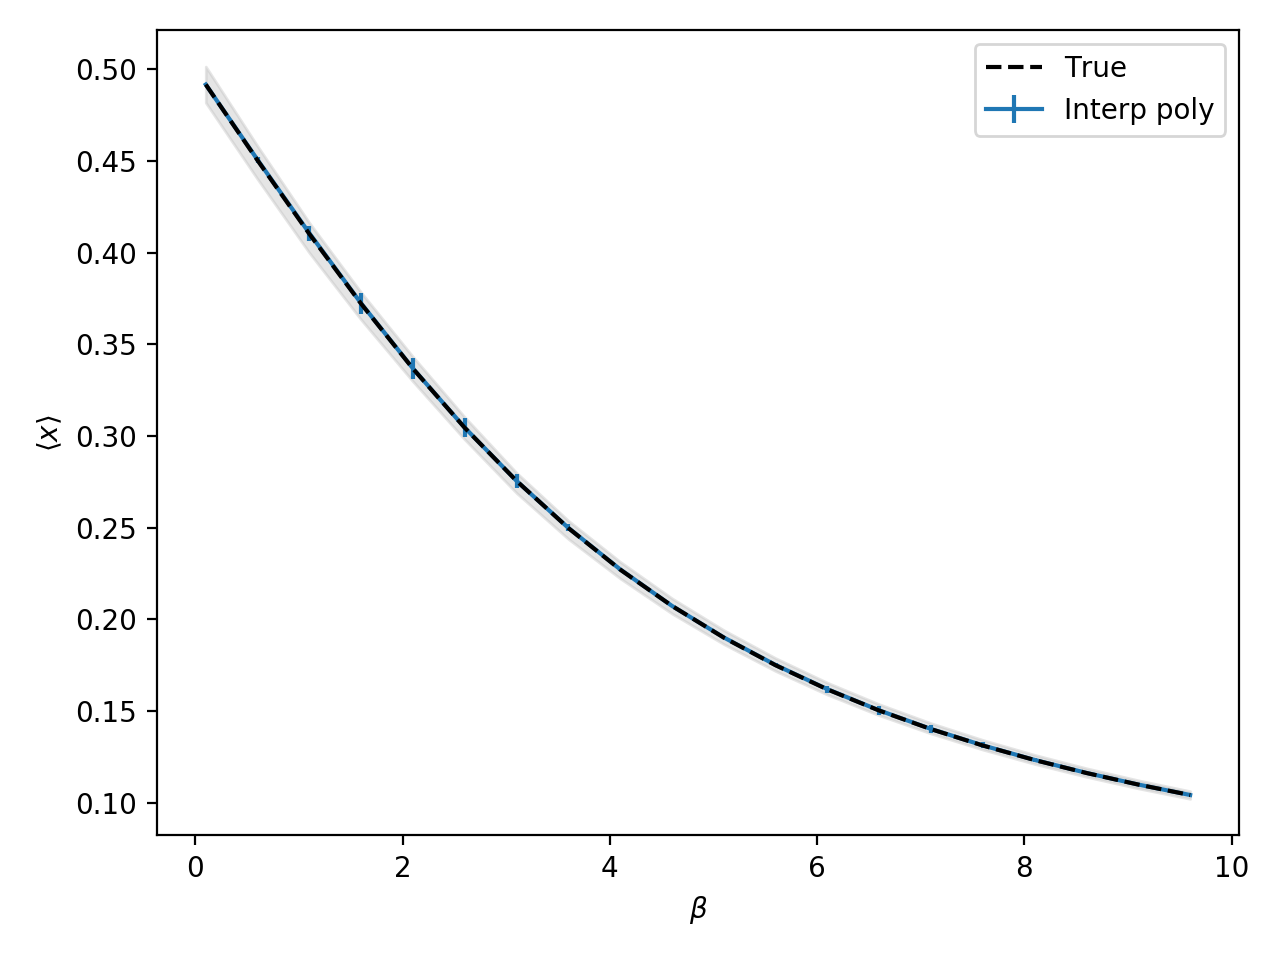

In [12]:
#Now want to look at recursive interpolation procedure
#Will only use polynomial interpolation model here

#Will perform extrapolation multiple times to get uncertainties and statistics
nRepeats = 10

iModelPoly = InterpModel(maxOrder=2)
intPstats = np.zeros((nRepeats, len(betavals)))
for i in range(nRepeats-1):
    intPpiecewise = RecursiveInterp(iModelPoly, [betavals[0], betavals[-1]], maxOrder=1, errTol=0.02)
    intPpiecewise.recursiveTrain(betavals[0], betavals[-1])
    intPstats[i,:] = intPpiecewise.predict(betavals)[:,0]
#Do last repeat with verbose output - also gives us a function to work with
intPpiecewise = RecursiveInterp(iModelPoly, [betavals[0], betavals[-1]], maxOrder=1, errTol=0.02)
intPpiecewise.recursiveTrain(betavals[0], betavals[-1], verbose=True)
intPstats[-1,:] = intPpiecewise.predict(betavals)[:,0]

#Plot to compare against true average versus beta for ideal gas model
interpFig, interpAx = plt.subplots()

interpAx.errorbar(betavals, np.average(intPstats, axis=0),
                  yerr=np.std(intPstats, ddof=1, axis=0), label='Interp poly')
#Compare resampling statistics to error from bootstrapping for LAST repeat
#Bootstrap error is gauranteed to be within errTol absolute relative error, so just shade around curve
predictedVals = intPpiecewise.predict(betavals)[:,0]
interpAx.fill_between(betavals, predictedVals-(0.02*abs(predictedVals)), predictedVals+(0.02*abs(predictedVals)),
                      color='silver', alpha=0.4)
interpAx.plot(betavals, mIG.avgX(betavals), 'k--', label='True', zorder=3)

interpAx.legend()

interpAx.set_ylabel(r'$\langle x \rangle$')
interpAx.set_xlabel(r'$\beta$')

interpFig.tight_layout()

plt.show()


The above cell runs an automated algorithm for performing interpolation recursively. In the above example, polynomial interpolation is used. This is recommended, but the algorithm may also use weighted extrapolation or MBAR. In the figure, the true observable is shown as the dotted black line. The blue line is the average over a number of runs of the recursive algorithm, with the error bars being the standard deviation over those runs. The gray shaded region represents data within the specified absolute relative error tolerance for bootstrapping over the last run of the recursive interpolation procedure.

A sketch of the recursive algorithm is as follows:

1. Perform interpolation between edge points
    * Only uses up to maximum desired order of derivative information. In the simple ideal gas model, it requires prohibitive amounts of sampling to get good accuracy of derivatives above order 2. If using polynomial interpolation, 2nd derivatives will give us order 5 polynomials. In practice, this probably isn't necessary, so settling for the much more accurate 3rd order interpolating polynomials, which only make use of 1st derivatives.
    * Needs input data at each edge point or must modify getData method in the RecursiveInterp class to read in data or perform simulations. As a default, this class just uses the toy ideal gas model to generate data.
  
  
2. Calculate bootstrapped uncertainty over whole interval
    * The region between the edge points is gridded up with the interpolation model used to predict the value at each point. This procedure is bootstrapped by resampling the data to get the standard deviation of each predicted value at each grid point. The absolute relative error is defined as $\frac{\sigma_x}{|x|}$. The maximum relative error over all grid points and observable elements (if the observable is a vector) is found and compared to the desired tolerance. 
  
  
3. Check if maximum uncertainty is within tolerance
    * If the maximum absolute relative error within the region is lower than the tolerance, then no new simulations are needed. If it is larger than the tolerance, a new state-point is selected where the absolute relative error is a maximum.
  
  
4. Add state point if necessary and recurse
    * If the tolerance is not met, a state point is added as described above. The algorithm returns to step one for each subinterval created, with new data only generated at the new point.


<IPython.core.display.Javascript object>


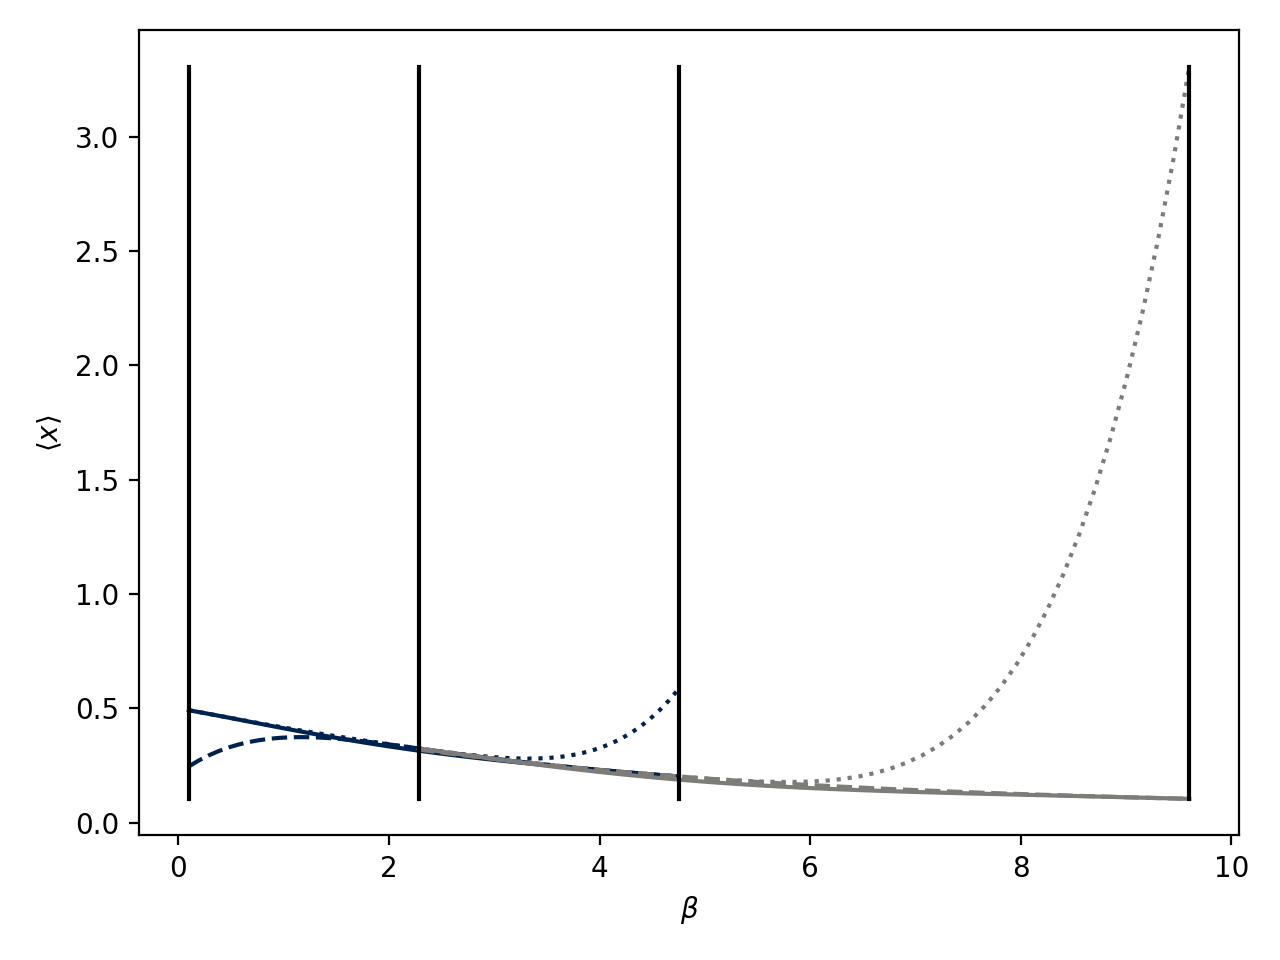

Interval with edges [0.1        2.28408996 4.75306122] (indices [0 1 2]):
	P-values between regions:
[[0.20261723]
 [0.21356302]
 [0.25390162]
 [0.40561744]
 [0.90285721]
 [0.61827623]]
	P-values for full and 1 :
[[0.971148  ]
 [0.93901702]
 [0.87318853]
 [0.54748377]
 [0.423042  ]
 [0.40089801]]
	P-values for full and 2 :
[[0.20260247]
 [0.21324873]
 [0.24729428]
 [0.28936908]
 [0.33255309]
 [0.37352694]]
Interval with edges [2.28408996 4.75306122 9.6       ] (indices [1 2 3]):
	P-values between regions:
[[0.55724109]
 [0.34486621]
 [0.24394233]
 [0.21705272]
 [0.21382074]
 [0.21650794]]
	P-values for full and 1 :
[[0.41269103]
 [0.35983951]
 [0.31061411]
 [0.271389  ]
 [0.24769957]
 [0.23573654]]
	P-values for full and 2 :
[[0.84342914]
 [0.73069176]
 [0.61820898]
 [0.53470667]
 [0.47771195]
 [0.43920437]]


In [13]:
#Can also check for consistency of local curvature rather than specifying the error tolerance
#Not implemented as an "optimization" rule in the recursive interpolation procedure
#But do have function to do statistical and visual check

#Using the model we just trained above, so must run cell above before this one
checkPvals = intPpiecewise.checkPolynomialConsistency(doPlot=True)


In the above plot, interpolating polynomials are shown for sliding windows of three state points used in the recursive interpolation model. Colors change for each window. Within a window (same color) the interpolating polynomial for the lower subregion is shown with a dotted line, that for the upper subregion with a dashed line, and the whole window region using the two outermost edge points with a solid line. Outside of the region they were fitted over, the polynomials show large deviations from the true values. For interpolation, however, the polynomials all overlap quite well. By construction, the piecewise function created by the recursive procedure is continuous in both its value and first derivative at all points in the entire interval. Using higher order derivative information would result in continuity in even higher derivatives, but likely even more divergent behavior outside of the interpolated range.

The point of the above consistency check is to see if the local polynomials agree within each sliding window. If they do, then that means the local curvature is the same over that region and is captured by the order of polynomial that is fit there. To this end, the polynomial coefficients are also boostrapped and, assuming Normal distributions, p-values are computed for the null hypothesis that the coefficients for each set of sub-regions and the full region within a window are the same. Since we want the polynomials to be the same, we don't want small p-values, so the test is of limited usefulness as larger p-values don't necessarily imply greater similarity. A better statistical test is thus needed. However, the visualization provides a quick visual check/rule of thumb to gauge the consistency of the local curvature and thus convergence of the algorithm. This is similar to the idea of generating overlapping distributions for umbrella sampling.

The analysis described above is VERY similar to leave-one-out analysis for Gaussian process regression. In other words, you could add a point where the error was the largest. You could then compare the mean predicted functions with and without the newly-sampled point. If the functions are the same within error, then you're done. If not, then you likely need to add more points. This focuses on local consistency of the function and could be performed for all intervals similar to what's described for the polynomials. This is in contrast to the idea of adding points until the uncertainty meets a given tolerance. Eventualy we will need to pick one criteria for the recursive algorithm to use, but we can always use the other to check quality of the result, as done above.

<IPython.core.display.Javascript object>


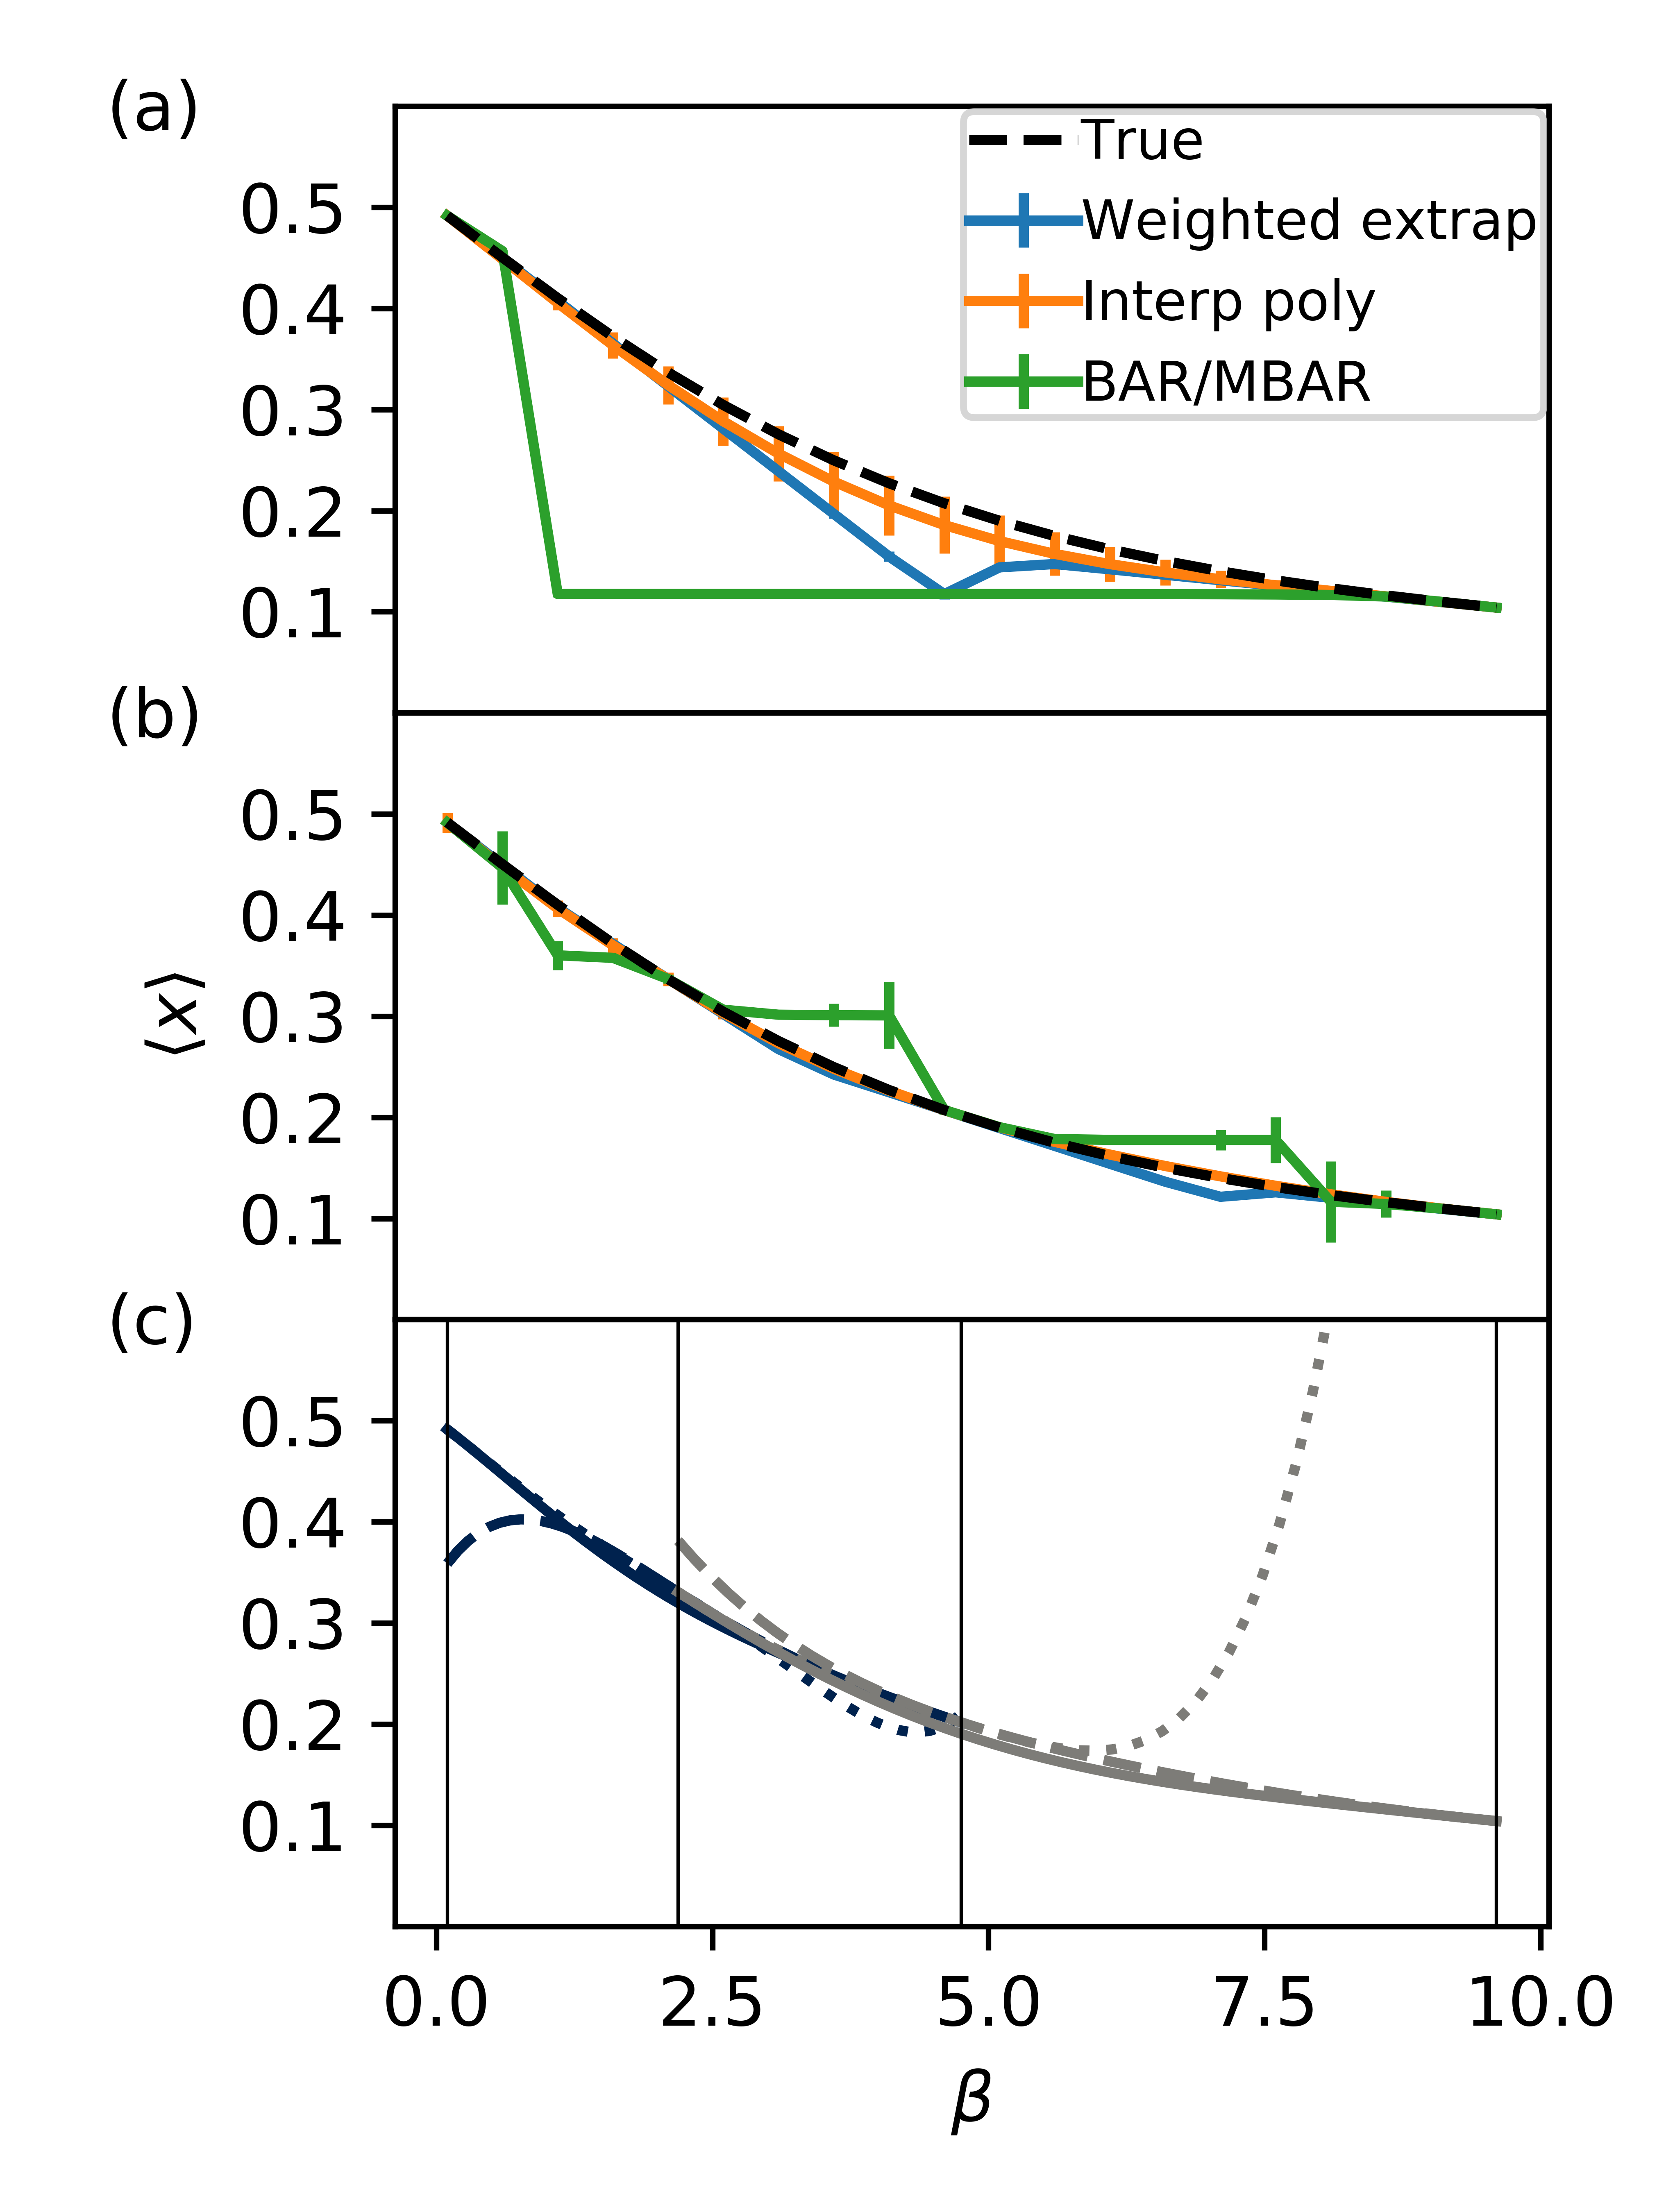

In [13]:
#Create a nice figure for the paper

#Here we will compare interpolation strategies, using the case of only two input points
#Recursive implementation of interpolation will come later

niceFig, niceAx = plt.subplots(3, sharex=True, sharey=True, figsize=(3.37, 4.5), dpi=600)

xdata1, udata1 = mIG.genData(betavals[0], nConfigs=10000)
xdata2, udata2 = mIG.genData(betavals[-1], nConfigs=10000)
xData = np.array([xdata1, xdata2])
uData = np.array([udata1, udata2])

#Check weighted extrapolation, polynomial interpolation, and MBAR (really just BAR because have 2 points)
iModelExtW = ExtrapWeightedModel(refB=[betavals[0], betavals[-1]], xData=xData, uData=uData, maxOrder=2)
iModelPoly = InterpModel(refB=[betavals[0], betavals[-1]], xData=xData, uData=uData, maxOrder=2)
with np.errstate(invalid='ignore'):
    iModelMBAR = MBARModel(refB=[betavals[0], betavals[-1]], xData=xData, uData=uData, maxOrder=2)

#And plot results, using bootstrapped error on same dataset for each type of model
niceAx[0].errorbar(betavals, iModelExtW.predict(betavals, order=1)[:,0], 
                   yerr=iModelExtW.bootstrap(betavals, order=1)[:,0], label='Weighted extrap')
niceAx[0].errorbar(betavals, iModelPoly.predict(betavals, order=1)[:,0], 
                   yerr=iModelPoly.bootstrap(betavals, order=1)[:,0], label='Interp poly')
with np.errstate(invalid='ignore'):
    niceAx[0].errorbar(betavals, iModelMBAR.predict(betavals, order=1)[:,0], 
                       yerr=iModelMBAR.bootstrap(betavals, order=1)[:,0], label='BAR/MBAR')
niceAx[0].plot(betavals, mIG.avgX(betavals), 'k--', label='True', zorder=3)

#niceAx[0].set_ylabel(r'$\langle x \rangle$', fontsize=10)
niceAx[0].legend(fontsize=8, handletextpad=0.05, borderpad=0.1, borderaxespad=0.1)

#Do recursive interpolation with polynomial
intPpiecewise = RecursiveInterp(iModelPoly, [betavals[0], betavals[-1]], maxOrder=1, errTol=0.02)
intPpiecewise.recursiveTrain(betavals[0], betavals[-1])

#Train weighted extrapolation and MBAR using same edges and same data
weightedPredictVals = np.zeros(len(betavals))
weightedPredictValsErr = np.zeros(len(betavals))
for i in range(1, intPpiecewise.edgeB.shape[0]):
    thisBvalsInds = np.arange(len(betavals))[(betavals>=intPpiecewise.edgeB[i-1])*(betavals<=intPpiecewise.edgeB[i])]
    wParams = iModelExtW.train(intPpiecewise.edgeB[i-1:i+1], 
                               np.array(intPpiecewise.xData[i-1:i+1]), 
                               np.array(intPpiecewise.uData[i-1:i+1]))
    weightedPredictVals[thisBvalsInds] = iModelExtW.predict(betavals[thisBvalsInds], order=1)[:,0]
    weightedPredictValsErr[thisBvalsInds] = iModelExtW.bootstrap(betavals[thisBvalsInds], order=1)[:,0]
with np.errstate(invalid='ignore'):
    iModelMBAR = MBARModel(refB=intPpiecewise.edgeB, 
                           xData=np.array(intPpiecewise.xData), 
                           uData=np.array(intPpiecewise.uData), maxOrder=2)

niceAx[1].errorbar(betavals, weightedPredictVals, yerr=weightedPredictValsErr, label='Weighted extrap')
predictedVals = intPpiecewise.predict(betavals)[:,0]
niceAx[1].errorbar(betavals, predictedVals, yerr=0.02*abs(predictedVals), label='Interp poly')
with np.errstate(invalid='ignore'):
    niceAx[1].errorbar(betavals, iModelMBAR.predict(betavals, order=1)[:,0], 
                       yerr=iModelMBAR.bootstrap(betavals, order=1)[:,0], label='BAR/MBAR')
niceAx[1].plot(betavals, mIG.avgX(betavals), 'k--', label='True', zorder=3)
niceAx[1].set_ylabel(r'$\langle x \rangle$', fontsize=10)
#niceAx[1].legend(fontsize=8, handletextpad=0.1, borderpad=0.1, borderaxespad=0.2)

#Finally, plot consistency check for piecewise interpolating polynomial
#Taking code from checkPolynomialConsistency
#Need to subdivide the full interval into pairs of neighboring intervals
#Easiest way is to take state point edge values in sliding sets of three
allInds = np.arange(intPpiecewise.edgeB.shape[0])
nrows = allInds.size - 3 + 1
n = allInds.strides[0]
edgeSets = np.lib.stride_tricks.as_strided(allInds, shape=(nrows,3), strides=(n,n))

#Before loop, set up plot if wanted
pColors = plt.cm.cividis(np.arange(len(edgeSets))/float(len(edgeSets)))
plotYmin = 1E+10
plotYmax = -1E+10

#Loop over sets of three edges
for i, aset in enumerate(edgeSets):
    #Start with regions we already have coefficients for
    reg1Coeffs = intPpiecewise.modelParams[aset[0]]
    reg1Err = intPpiecewise.modelParamErrs[aset[0]]
    reg2Coeffs = intPpiecewise.modelParams[aset[1]]
    reg2Err = intPpiecewise.modelParamErrs[aset[1]]
    
    #To check full interval, must retrain model with data
    fullCoeffs = intPpiecewise.model.train(intPpiecewise.edgeB[aset[[0,2]]],
                                           np.array([intPpiecewise.xData[aset[0]], intPpiecewise.xData[aset[2]]]),
                                           np.array([intPpiecewise.uData[aset[0]], intPpiecewise.uData[aset[2]]]),
                                           saveParams=True)
    fullErr = intPpiecewise.model.bootstrap(None)

    plotPoints = np.linspace(intPpiecewise.edgeB[aset[0]], intPpiecewise.edgeB[aset[2]], 50)
    plotFull = np.polynomial.polynomial.polyval(plotPoints, fullCoeffs[:,0])
    plotReg1 = np.polynomial.polynomial.polyval(plotPoints, reg1Coeffs[:,0])
    plotReg2 = np.polynomial.polynomial.polyval(plotPoints, reg2Coeffs[:,0])
    niceAx[2].plot(plotPoints, plotFull, color = pColors[i], linestyle='-')
    niceAx[2].plot(plotPoints, plotReg1, color = pColors[i], linestyle=':')
    niceAx[2].plot(plotPoints, plotReg2, color = pColors[i], linestyle='--')
    allPlotY = np.hstack((plotFull, plotReg1, plotReg2))
    if np.min(allPlotY) < plotYmin:
        plotYmin = np.min(allPlotY)
    if np.max(allPlotY) > plotYmax:
        plotYmax = np.max(allPlotY)

for edge in intPpiecewise.edgeB:
    niceAx[2].plot([edge]*2, [0.0, 0.6], 'k-', linewidth=0.5)

niceAx[2].set_xlabel(r'$\beta$', fontsize=10)
#niceAx[2].set_ylabel(r'$\langle x \rangle$', fontsize=10)

for a in niceAx:
    a.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=6, prune='both'))
    a.tick_params(axis='both', labelsize=10)

niceAx[0].annotate('(a)', xy=(-0.25,0.96), xycoords='axes fraction', fontsize=10)
niceAx[1].annotate('(b)', xy=(-0.25,0.96), xycoords='axes fraction', fontsize=10)
niceAx[2].annotate('(c)', xy=(-0.25,0.96), xycoords='axes fraction', fontsize=10)

niceAx[2].set_ylim((0.0, 0.6))

niceFig.tight_layout()
niceFig.subplots_adjust(hspace=0.0)

plt.show()


In [6]:
#For quantities like the chemical potential, we're interested in the -log(<X>), not <X>
#Everything is the same, but we take derivatives differently
#Luckily, have closed-form expression for derivatives of -log(<X>) in terms of derivatives of <X>
#Specifically, d(n)[-log(<X>)]/dB(n) = Sum(k=1, n)[(k-1)! * (-1/<X>)^k * B(n,k,(d<X>/dB, ..., d(n-k+1)<X>/dB(n-k+1)))]
#B(n,k, (...)) represents Bell Polynomials, which are implemented in sympy (not numpy or scipy unfortunately)
#Create custom classes to handle this
from sympy import bell

class LogAvgExtrapModel(ExtrapModel):
    
    def calcDerivVals(self, refB, x, U):
        
        if x.shape[0] != U.shape[0]:
            print('First observable dimension (%i) and size of potential energy array (%i) do not match!'%(x.shape[0], U.shape[0]))
            return
    
        avgUfunc, avgXUfunc = buildAvgFuncs(x, U, self.maxOrder)
        derivVals = np.zeros((self.maxOrder+1, x.shape[1]))
        for o in range(self.maxOrder+1):
            if o == 0:
                derivVals[o] = (-np.log(avgXUfunc(0)))
                continue
            for k in range(1,o+1):
                thisDiffs = np.array([self.derivF[l](avgUfunc, avgXUfunc) for l in range(1, o-k+2)])
                for l in range(x.shape[1]):
                    derivVals[o,l] += np.math.factorial(k-1)*((-1/avgXUfunc(0))**k)*bell(o, k, thisDiffs[:,l])
                
        return derivVals



<IPython.core.display.Javascript object>


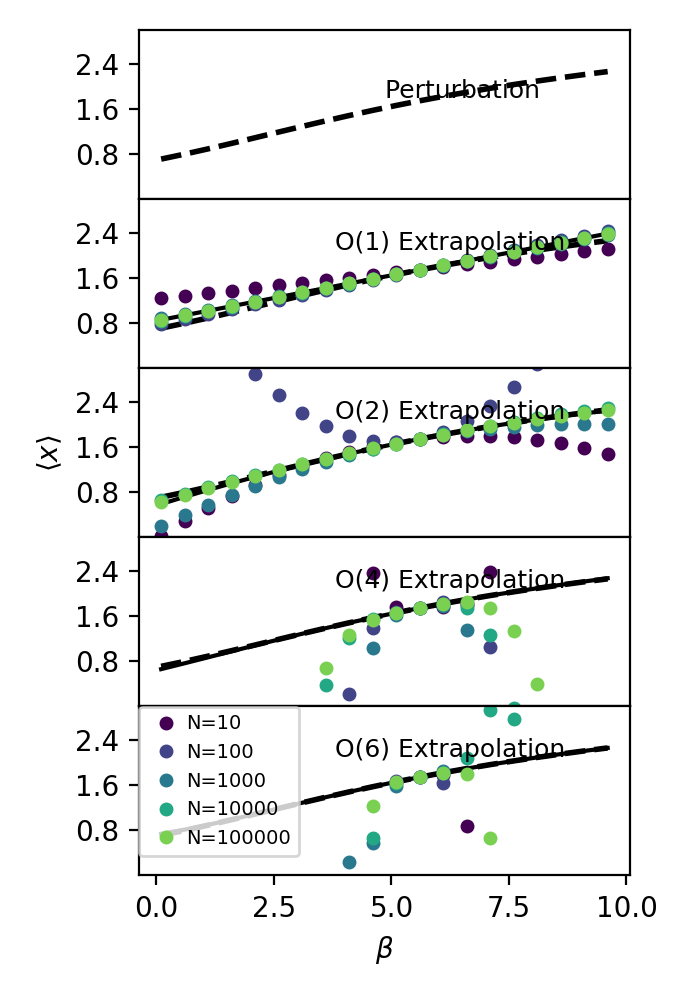

True extrapolation coeffiecients: [ 1.74377054e+00  1.61056939e-01 -1.77268660e-02  3.66764737e-04
  2.11140145e-03 -1.53768224e-03  3.99266294e-04]
	 With N_configs =     10: [ 1.74809998e+00  9.28824594e-02 -8.00103715e-02 -2.28527832e+00
  8.86925707e+00  2.40000221e+02 -2.09230568e+03]
	 With N_configs =    100: [ 1.74189602e+00  1.74552247e-01  2.89263621e-01  2.82920971e-01
 -6.77139015e+00 -4.36122492e+02 -4.80796355e+03]
	 With N_configs =   1000: [ 1.74336498e+00  1.56096121e-01 -4.57605422e-02  8.72648503e-03
 -1.24501642e+01  2.10991090e+02  9.33098955e+02]
	 With N_configs =  10000: [ 1.74395165e+00  1.63321340e-01 -1.23825312e-02 -3.96099538e-01
 -2.30949226e+00  7.37545703e+01 -1.89822555e+02]
	 With N_configs = 100000: [ 1.74380139e+00  1.60334372e-01 -1.50357163e-02  4.91917880e-03
 -1.05619008e+00  1.53380508e+01 -1.29589627e+02]


In [12]:
#Really want to test formula for extrapolating quantities that are the natural logarithm of an average
#So to do this, use analytical model

#Repeat comparison of results, but for -ln<x> instead of <x>

%matplotlib notebook

#Define reference beta and generate all the data we could want
refBeta = betavals[11]
xdata, udata = mIG.genData(refBeta, nConfigs=100000)

#Define orders to extrapolate to
extOrders = [1,2,4,6]

fig, ax = plt.subplots(len(extOrders)+1, sharex=True, sharey=True, figsize=(3.37,5))

#nsampvals = np.geomspace(10, len(xdata), num=4, dtype=int)
nsampvals = np.array((10.0*np.ones(5))**np.arange(1,6), dtype=int)
nsampcolors = plt.cm.viridis(np.arange(0.0, 1.0, float(1.0/len(nsampvals))))

#First plot the analytical result
for a in ax:
    a.plot(betavals, -np.log(mIG.avgX(betavals)), 'k--', linewidth=2.0)

#And the infinite sampling results for each extrapolation order
#Must carefully calculate derivatives with Faa di Bruno's formula, then manually do extrapolation
trueDerivs = np.zeros(np.max(extOrders)+1)
for o in range(np.max(extOrders)+1):
    if o == 0:
        trueDerivs[o] = (-np.log(mIG.avgX(refBeta)))
        continue
    for k in range(1,o+1):
        thisDiffs = np.array([mIG.avgXsym.diff(mIG.b, l).subs(mIG.b, refBeta) for l in range(1, o-k+2)])
        trueDerivs[o] += np.math.factorial(k-1)*((-1/mIG.avgX(refBeta))**k)*bell(o, k, thisDiffs)
print('True extrapolation coeffiecients: %s'%str(trueDerivs))

for j, o in enumerate(extOrders):
    trueExtrap = 0.0
    for k in range(o+1):
        trueExtrap += trueDerivs[k]*((betavals-refBeta)**k)/np.math.factorial(k)
    ax[j+1].plot(betavals, trueExtrap, 'k-')

#Train extrapolation models with the full dataset
extModel = LogAvgExtrapModel(refB=refBeta, xData=xdata, uData=udata, maxOrder=extOrders[-1])

for i, n in enumerate(nsampvals):
    thisinds = np.random.choice(len(xdata), size=n, replace=False)
    
    #Get parameters for extrapolation model with this data by training it - the parameters are the derivatives
    thisext = extModel.train(refBeta, xdata[thisinds], udata[thisinds], saveParams=False)
    print('\t With N_configs = %6i: %s'%(n, str(thisext.flatten()))) #Have to flatten because observable is 1-D
    for j, o in enumerate(extOrders):
        dataExtrap = extModel.predict(betavals, params=thisext, order=o)
        ax[j+1].plot(betavals, dataExtrap, 'o', markersize=4, color=nsampcolors[i], label='N=%i'%n)

ax[2].set_ylabel(r'$\langle x \rangle$')
ax[-1].set_xlabel(r'$\beta$')

ax[0].annotate('Perturbation', xy=(0.5, 0.6), xycoords='axes fraction', fontsize=9)
for j, o in enumerate(extOrders):
    ax[j+1].annotate('O(%i) Extrapolation'%(o), xy=(0.4, 0.7), xycoords='axes fraction', fontsize=9)

ax[0].set_ylim((0.0, 3.0))
ax[-1].yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=4, prune='both'))
ax[-1].legend(borderaxespad=0.01, handletextpad=0.01, fontsize=7)

fig.tight_layout()
fig.subplots_adjust(hspace=0.0)

plt.show()
